# Descriptive statistics 
Dataset: Dataset of academic performance evolution for engineering students published April 18th 2020, collected by the Colombian Institute for the Evaluation of Education (ICFES) in xlsx format: **data_academic_performance.xlsx**

The following plots will be presented: 
- Number of individuals by gender
- Number of individuals by socio-economic level by attribute STRATUM
- Number of individuals by gender&socio-economic level


- Distribution of grades by gender (before and after college)
- Distribution of grades by socio-economic-level (before and after college)
- Distribution of grades by gender&socio-economic level (before and after college)


- Matrix showing the Pearson correlation between grades (before), grades (after), gender, socio-economic level
- Scatter-plot showing the correlation between grades before vs after college. 


The plots can be visualized for standardized, normalized or raw data. Change the df configuration accordingly. 

## Load packages

In [43]:
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import matplotlib as mpl
import numpy as np

## Plots setup

In [44]:
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (7,2.5)
    mpl.rcParams["figure.dpi"] = 600
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

## Load dataset

In [45]:
# df = pd.read_csv("df_sum_score_ex.csv")

# df_norm = pd.read_csv("df_sum_score_norm.csv")
#df_stand = pd.read_csv("df_sum_score_standardized.csv") #to check plots for standardised

# TODO disse csv'er skal laves i data, så de kan loades her

# Distributions

## Number of individuals by gender

In [46]:
# Skal rykkes til Data.ipynb - TODOOOOO
df = pd.read_csv('GUDF.csv')
df = df[df.STRATUM!='0']
# GUDF = pd.read_csv('GUDF.csv')


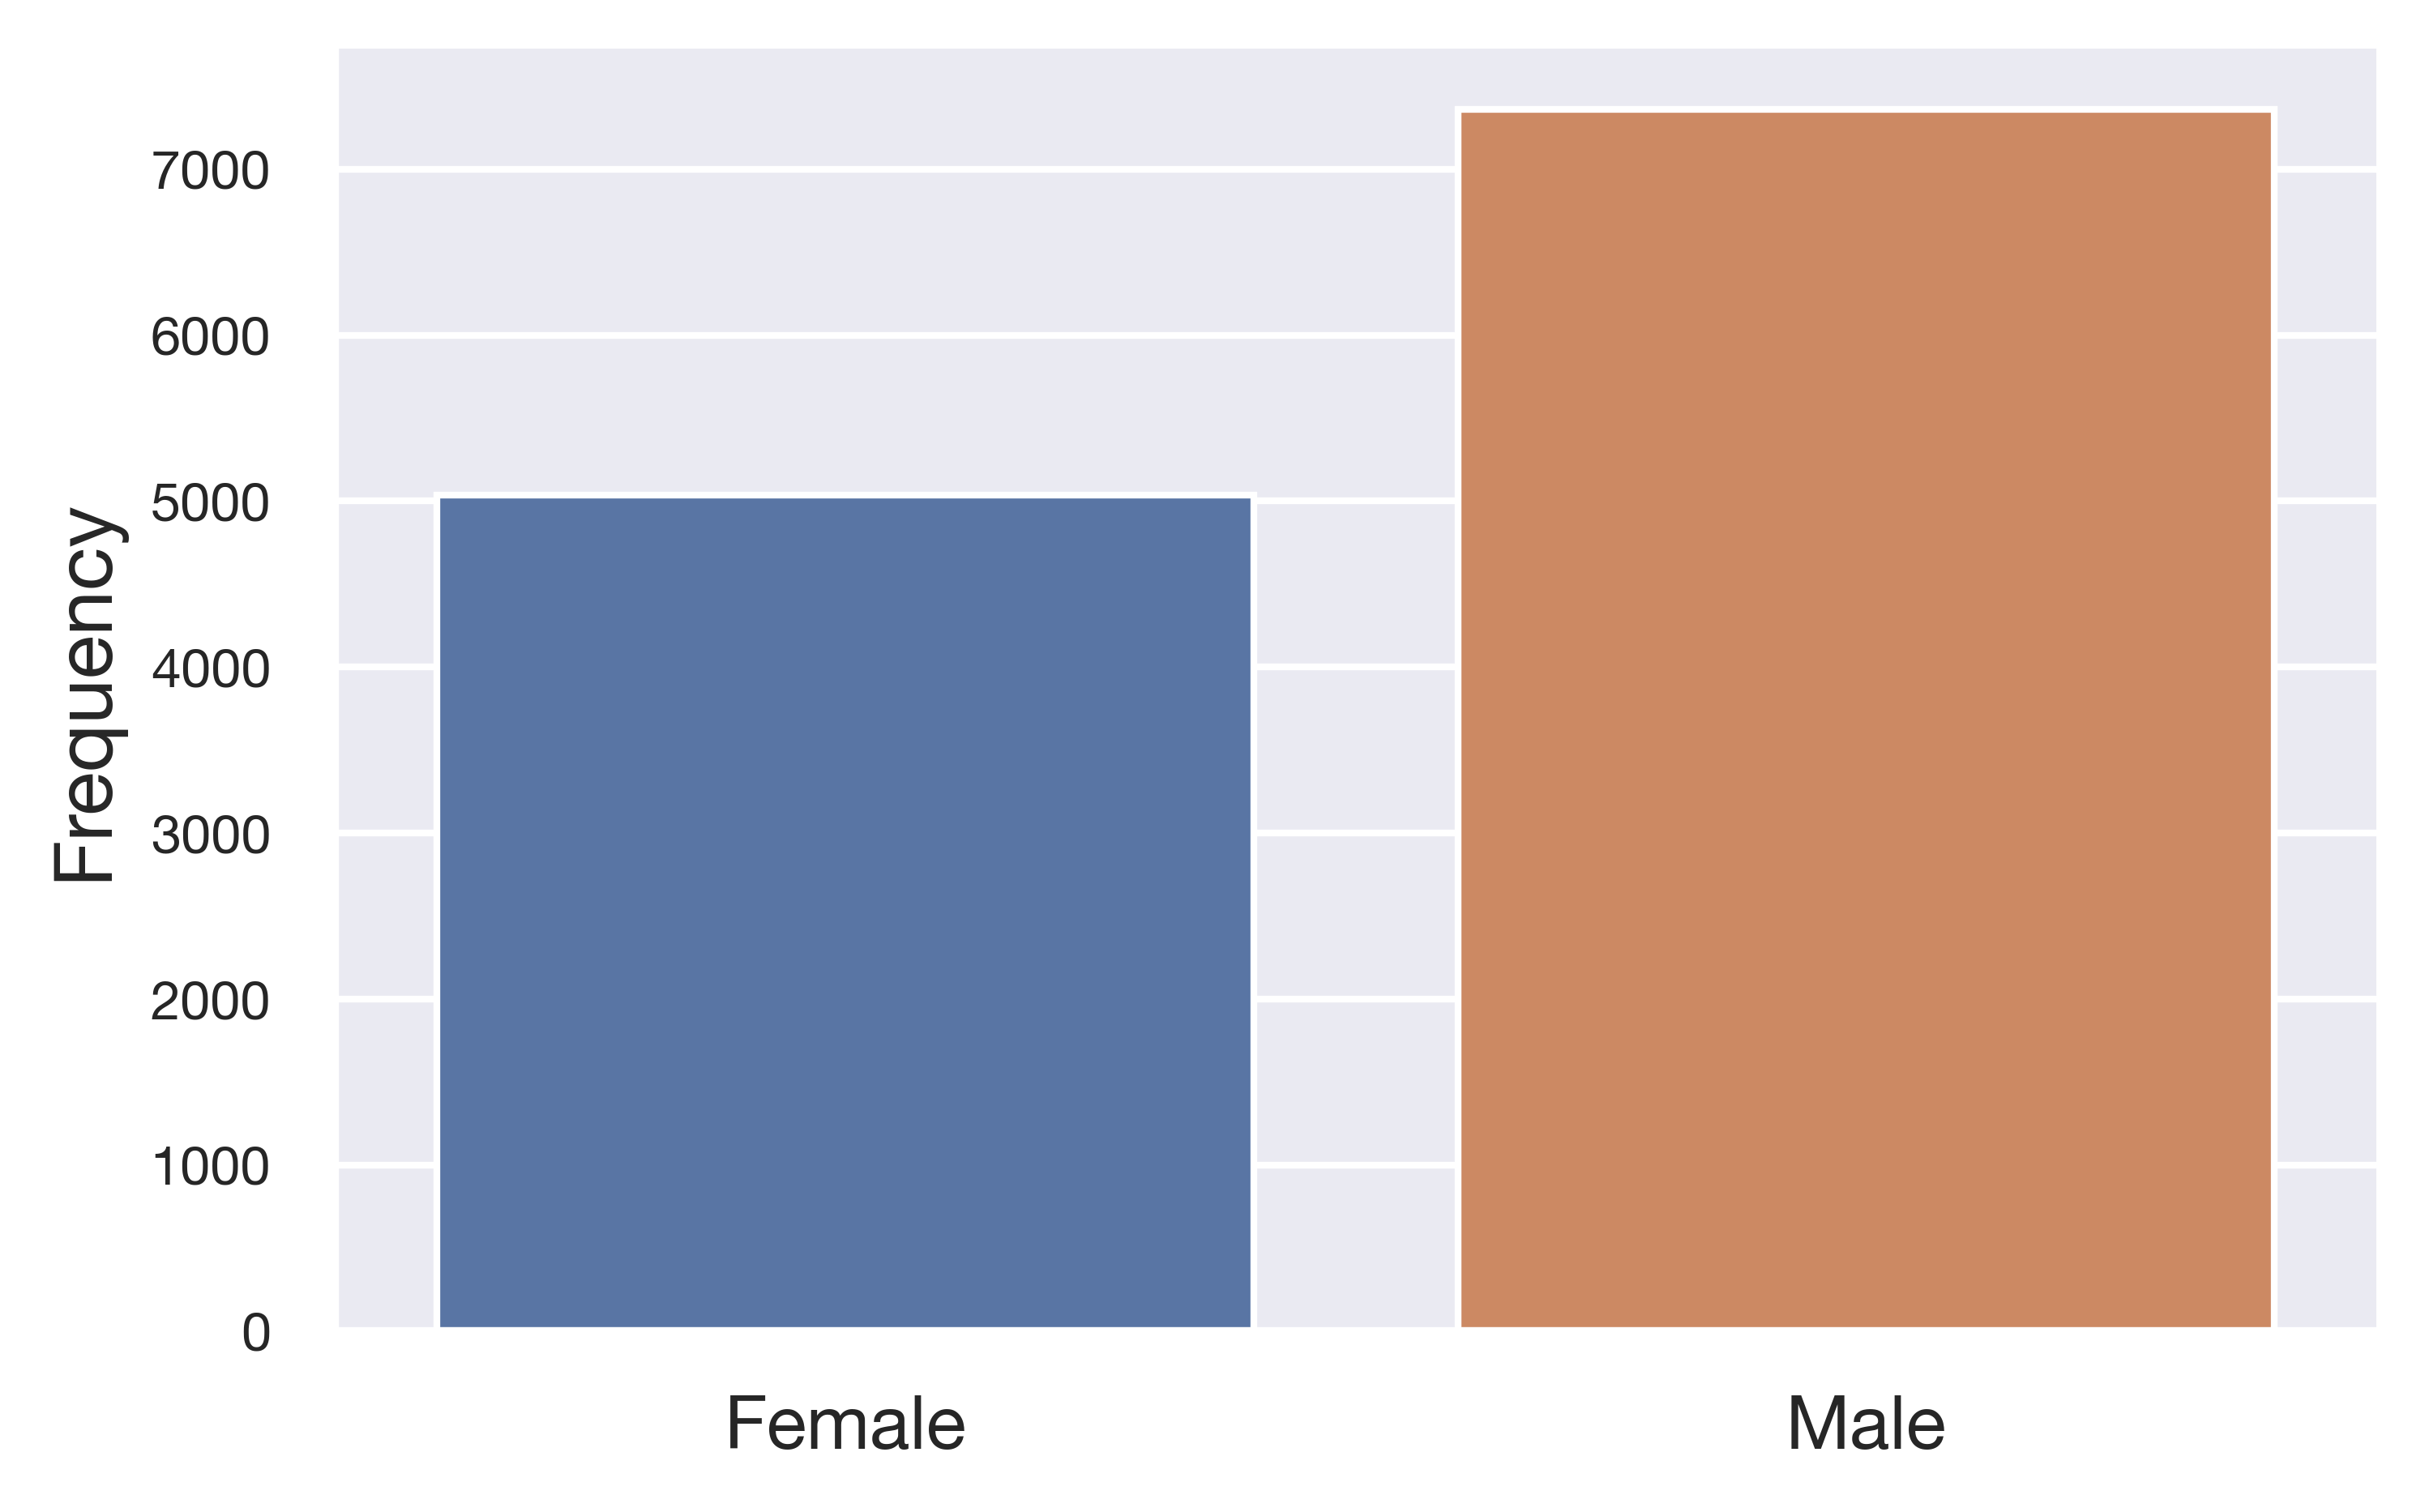

In [47]:
# df = pd.read_csv("df_sum_score_ex.csv")

g = sns.catplot(x='GENDER', data=df, kind='count', legend=True)
g.fig.set_size_inches(5, 3)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]

    #ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)
    ax.set_xlabel('', fontdict=None, labelpad=None)
    ax.set_ylabel('Frequency', fontdict=None, labelpad=None)
    ax.set_xticklabels(['Female','Male'])
    ax.xaxis.set_tick_params(labelsize=11)
    ax.yaxis.set_tick_params(labelsize=8)

# Save as a SVG and PNG
plt.savefig("gender_amount.png")


## Number of individuals by gender & socio-economic level - barplot

In [48]:
# g = sns.catplot(x="STRATUM", kind="count",   data=df, legend=True, order=['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])
# g.fig.set_size_inches(5, 3)

# # extract the matplotlib axes_subplot objects from the FacetGrid
# ax = g.facet_axis(0, 0)

# # iterate through the axes containers
# for c in ax.containers:
#     labels = [f'{(v.get_height()):.1f}' for v in c]

#     ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)
# ax.set_xlabel('Socioeconomic levels', fontdict=None, labelpad=None)
# ax.set_ylabel('Frequency', fontdict=None, labelpad=None)
# ax.xaxis.set_tick_params(labelsize=8)
# ax.yaxis.set_tick_params(labelsize=8)

# # Save as a SVG and PNG
# plt.savefig("STRATUM_amount.png")
# #TODO TITLE

## Number of individuals by gender & socio-economic level - Stacked barplot

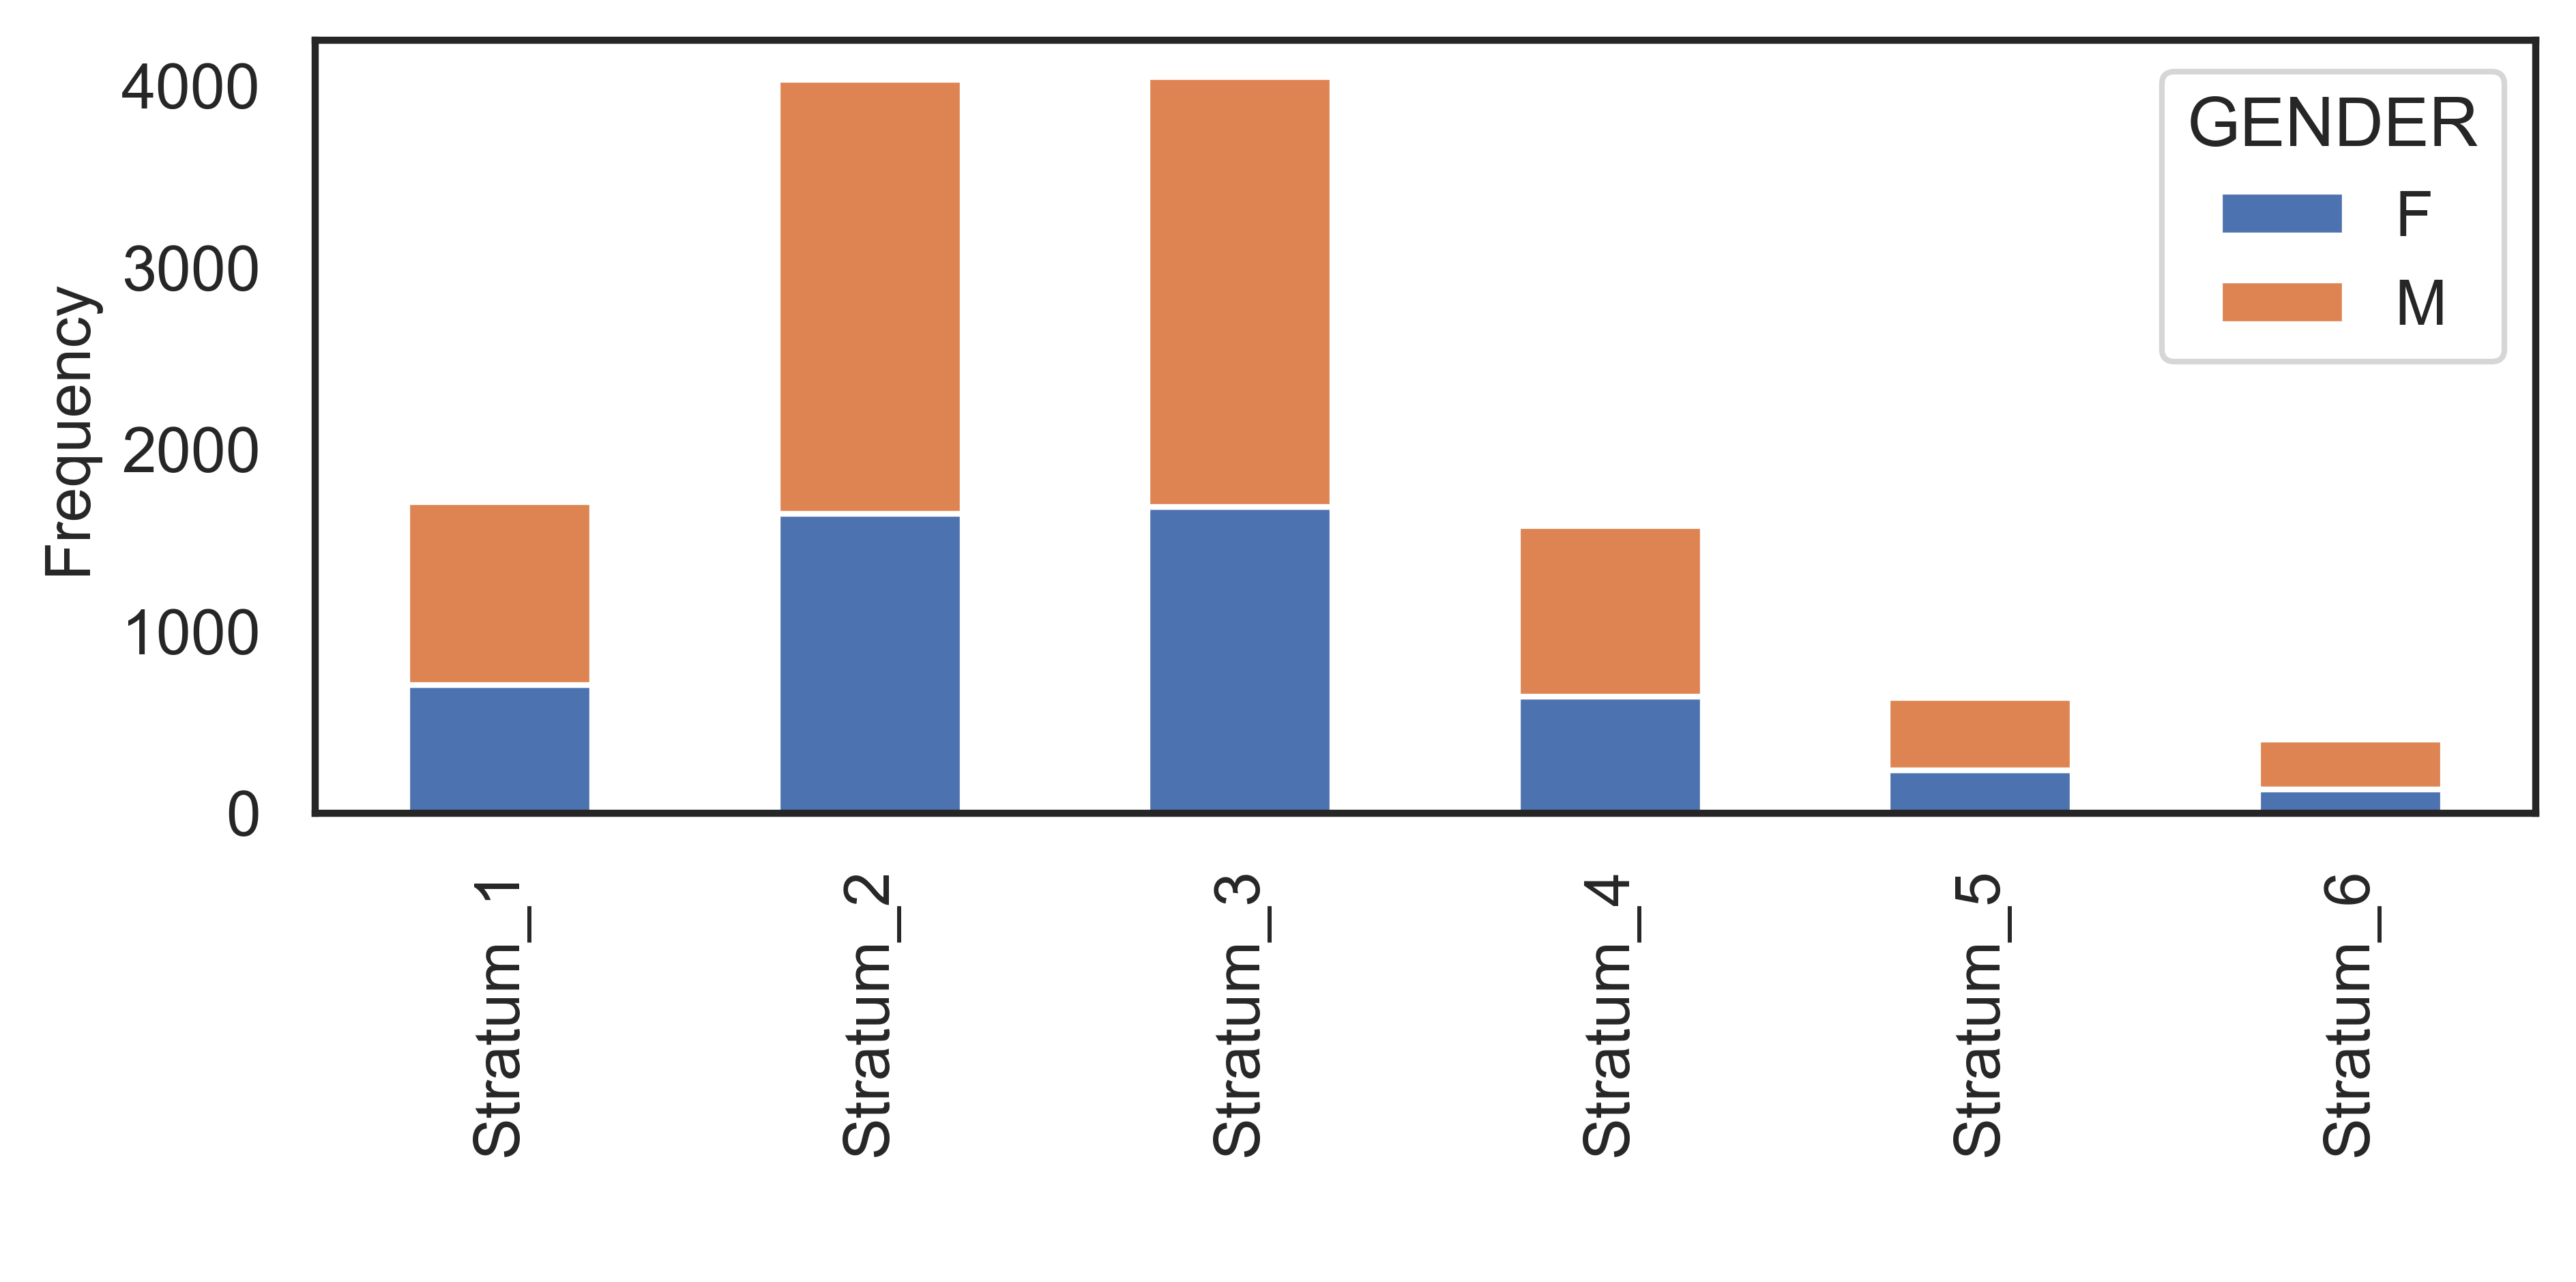

In [50]:
# Create dataframe of number of Males (M) and Females (F) by each stratum level
sns.set_theme(style="white")

df_gen_soc = df.groupby(["STRATUM", "GENDER"]).size().reset_index().pivot(columns='GENDER', index='STRATUM', values=0)

# Stacked bar chart of the gender/stratum dataframe above
df_gen_soc.plot(kind='bar', stacked=True)
#plt.title("Number of individuals by gender & socioeconomic level", size=14)
plt.ylabel("Frequency", size=11)
plt.xlabel(" ")

# Save as a SVG and PNG
plt.savefig("gender_STRATUM_amount.png",bbox_inches="tight")
plt.show()

import warnings

warnings.filterwarnings('ignore')

## Men and women highschool and college grades average histograms 

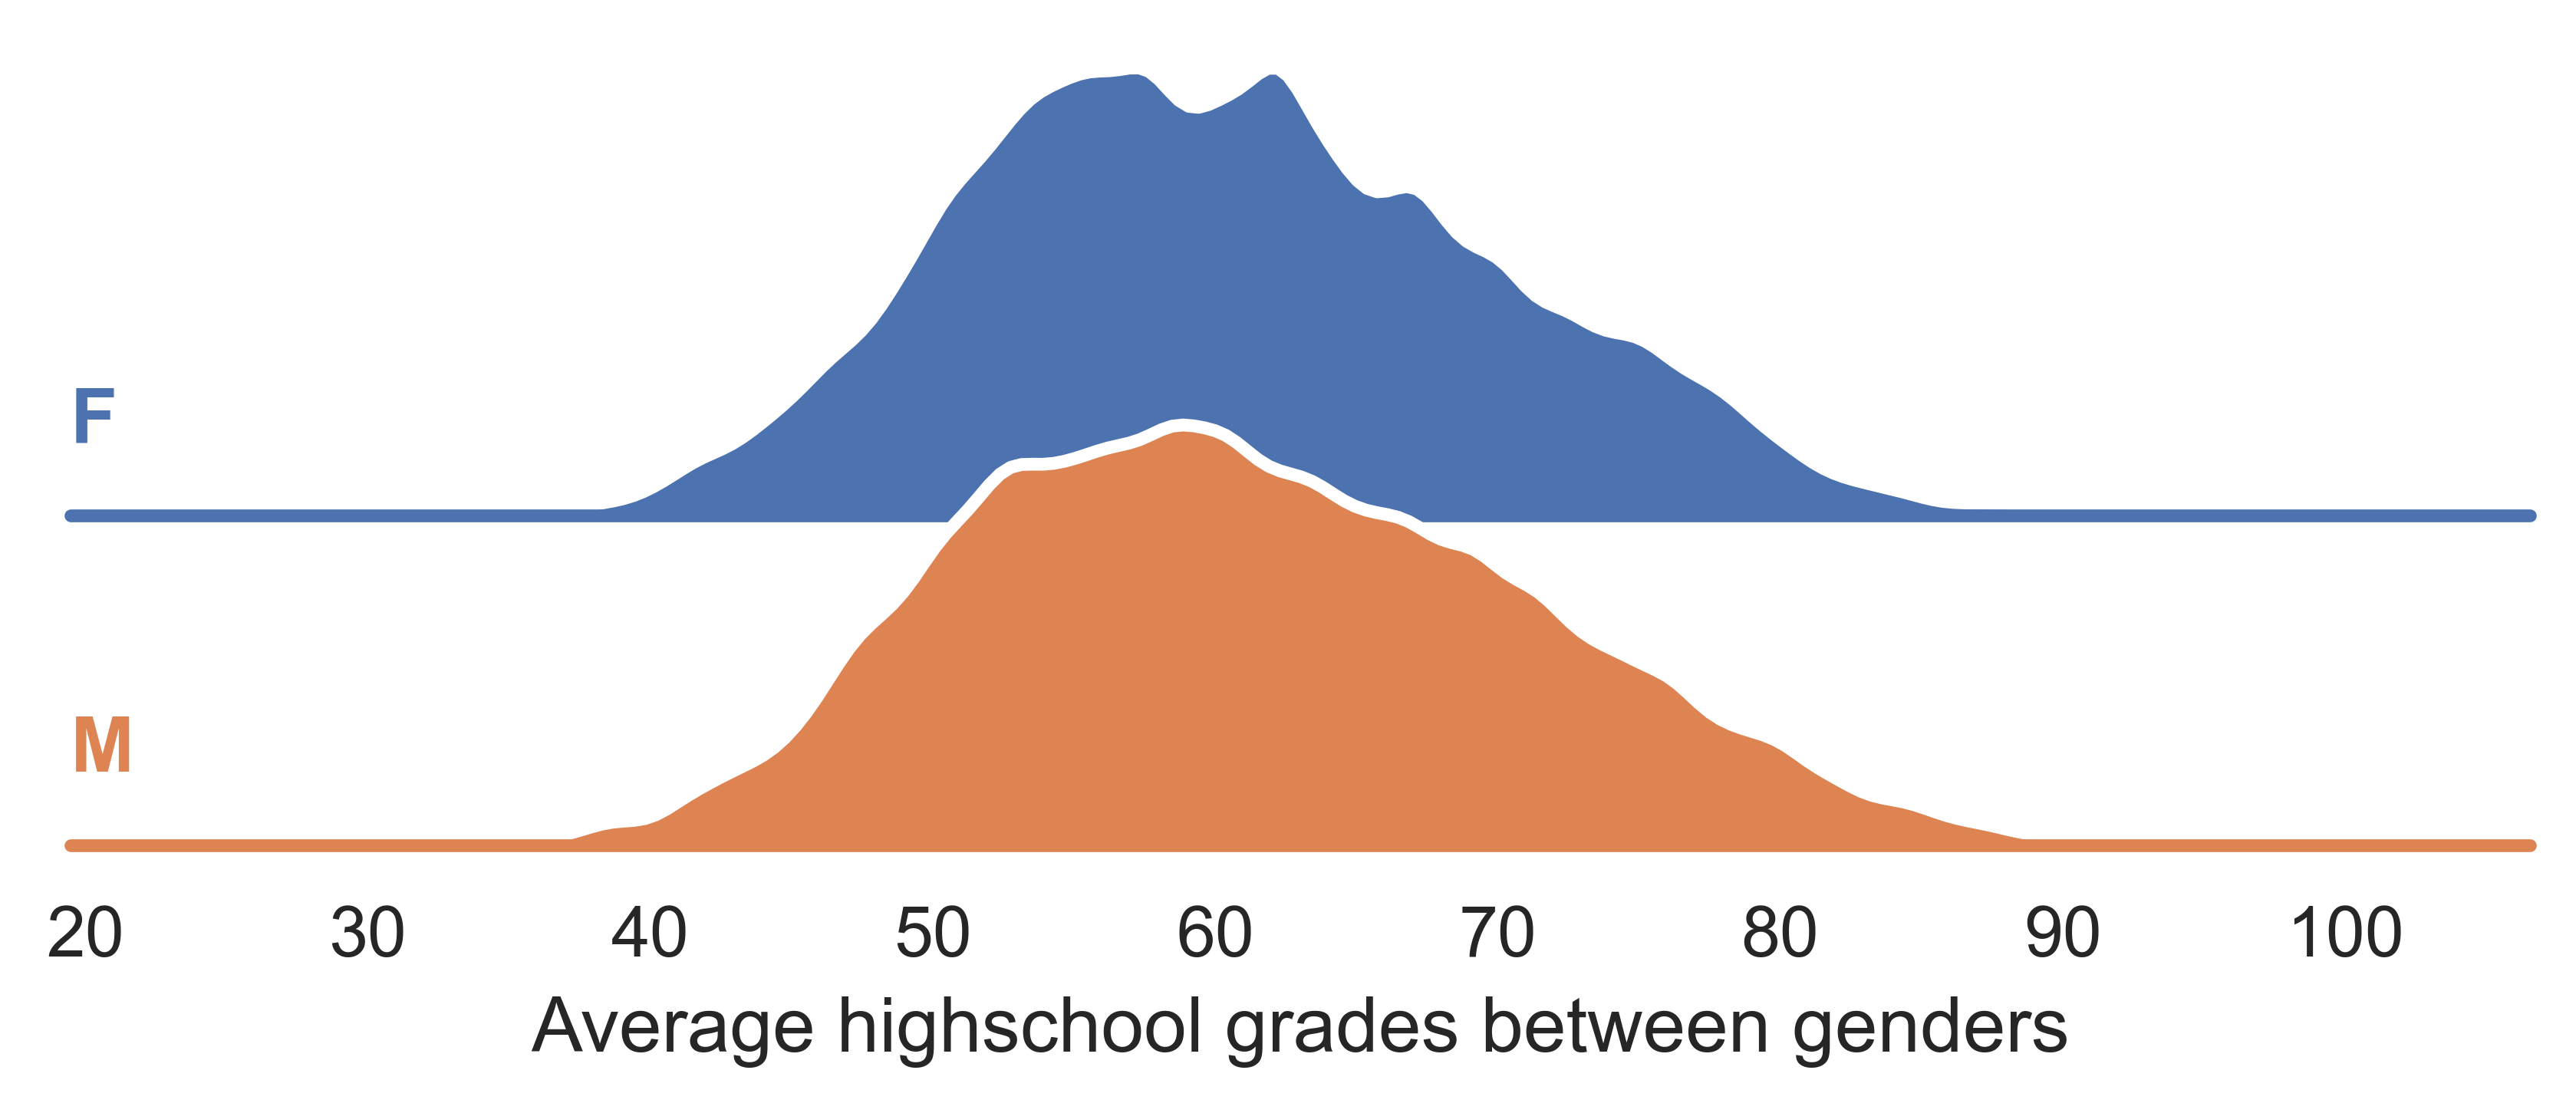

In [8]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# df = pd.read_csv("df_sum_score.csv")
# df = pd.read_csv("df_sum_score_ex.csv")
df = pd.read_csv("GUDF.csv")


def Ridgeline_dists(df,x, metric="",plot_label=""):
    
    df_temp = df.copy()
    x = x 
    g = df_temp.GENDER
    df_kat = pd.DataFrame(dict(x=x, g=g))
    df_kat_order = df_kat.groupby(["g"]).count()
    df_kat_order = df_kat_order.sort_values(by="x", ascending=False)

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
    g = sns.FacetGrid(
        df_kat,
        row="g",
        hue="g",
        aspect=10,
        height=0.8,
        # palette=pal # Denne gør den i de 2 blå farver
    )

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "x", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.2)
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            0,
            0.2,
            label,
            fontweight="bold",
            color=color,
            ha="left",
            va="center",
            transform=ax.transAxes
        )

    g.map(label, "x")

    g.set_xlabels(plot_label)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-0.30)
    g.fig.set_size_inches(6, 5)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    

Ridgeline_dists(df,x=df.HI_GRADE_AVG,plot_label='Average highschool grades between genders')
# plt.axvline(x=df.HI_GRADE_AVG[df.GENDER_bin == 1].median(),
#             color='blue',
#             marker='.', 
#             lw=1)
# plt.axvline(x=df.HI_GRADE_AVG[df.GENDER_bin == 0].median(),
#             color='sandybrown',
#             marker='.', 
#             lw=1)
# plt.axvline(x=np.quantile(df.HI_GRADE_AVG[df.GENDER_bin == 0], .75),
#             color='sandybrown',
#             ls='--', 
#             lw=1)
# plt.axvline(x=np.quantile(df.HI_GRADE_AVG[df.GENDER_bin == 1], .75),
#             color='blue',
#             ls='--', 
#             lw=1)
# plt.axvline(x=np.quantile(df.HI_GRADE_AVG[df.GENDER_bin == 0], .25),
#             color='sandybrown',
#             ls='--', 
#             lw=1)
# plt.axvline(x=np.quantile(df.HI_GRADE_AVG[df.GENDER_bin == 1], .25),
#             color='blue',
#             ls='dotted', 
#             lw=1)

# Save as a SVG and PNG
# plt.savefig("ridgeline_hi_grade.png")


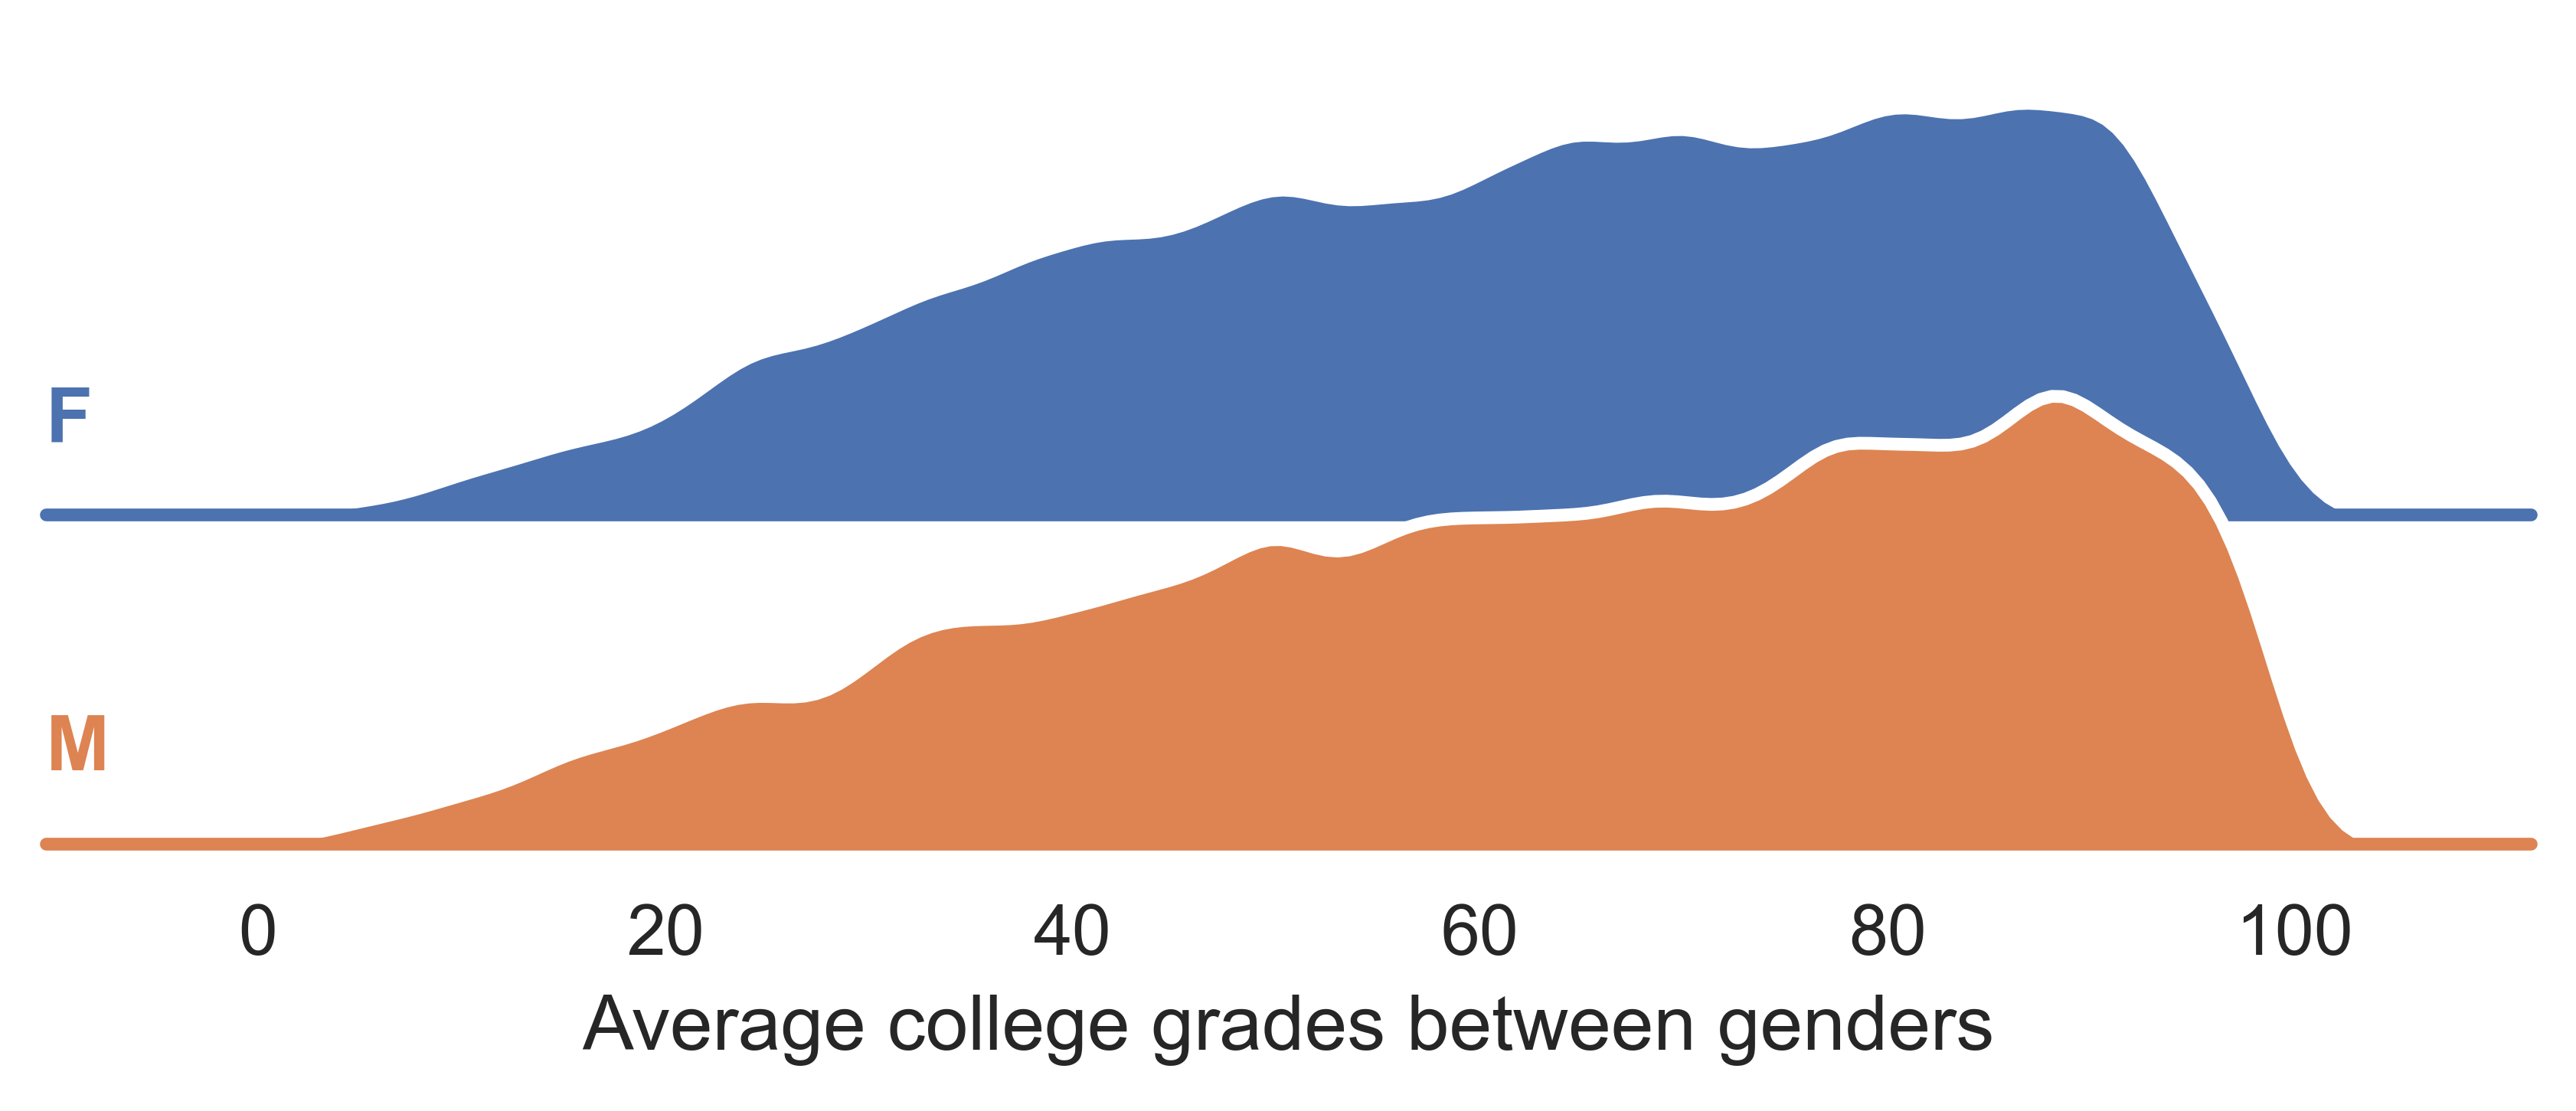

In [9]:
Ridgeline_dists(df,x=df.COL_GRADE_AVG,plot_label='Average college grades between genders')
# plt.axvline(x=df.COL_GRADE_AVG[df.GENDER_bin == 1].median(),
#             color='blue',
#             marker='.', 
#             lw=1)
# plt.axvline(x=df.COL_GRADE_AVG[df.GENDER_bin == 0].median(),
#             color='sandybrown',
#             marker='.', 
#             lw=1)
# plt.axvline(x=np.quantile(df.COL_GRADE_AVG[df.GENDER_bin == 0], .75),
#             color='sandybrown',
#             ls='--', 
#             lw=1)
# plt.axvline(x=np.quantile(df.COL_GRADE_AVG[df.GENDER_bin == 1], .75),
#             color='blue',
#             ls='--', 
#             lw=1)
# plt.axvline(x=np.quantile(df.COL_GRADE_AVG[df.GENDER_bin == 0], .25),
#             color='sandybrown',
#             ls='--', 
#             lw=1)
# plt.axvline(x=np.quantile(df.COL_GRADE_AVG[df.GENDER_bin == 1], .25),
#             color='blue',
#             ls='dotted', 
#             lw=1)
# Save as a SVG and PNG
# plt.savefig("ridgeline_col_grade.png")


## Men and women highschool and college grades average histograms

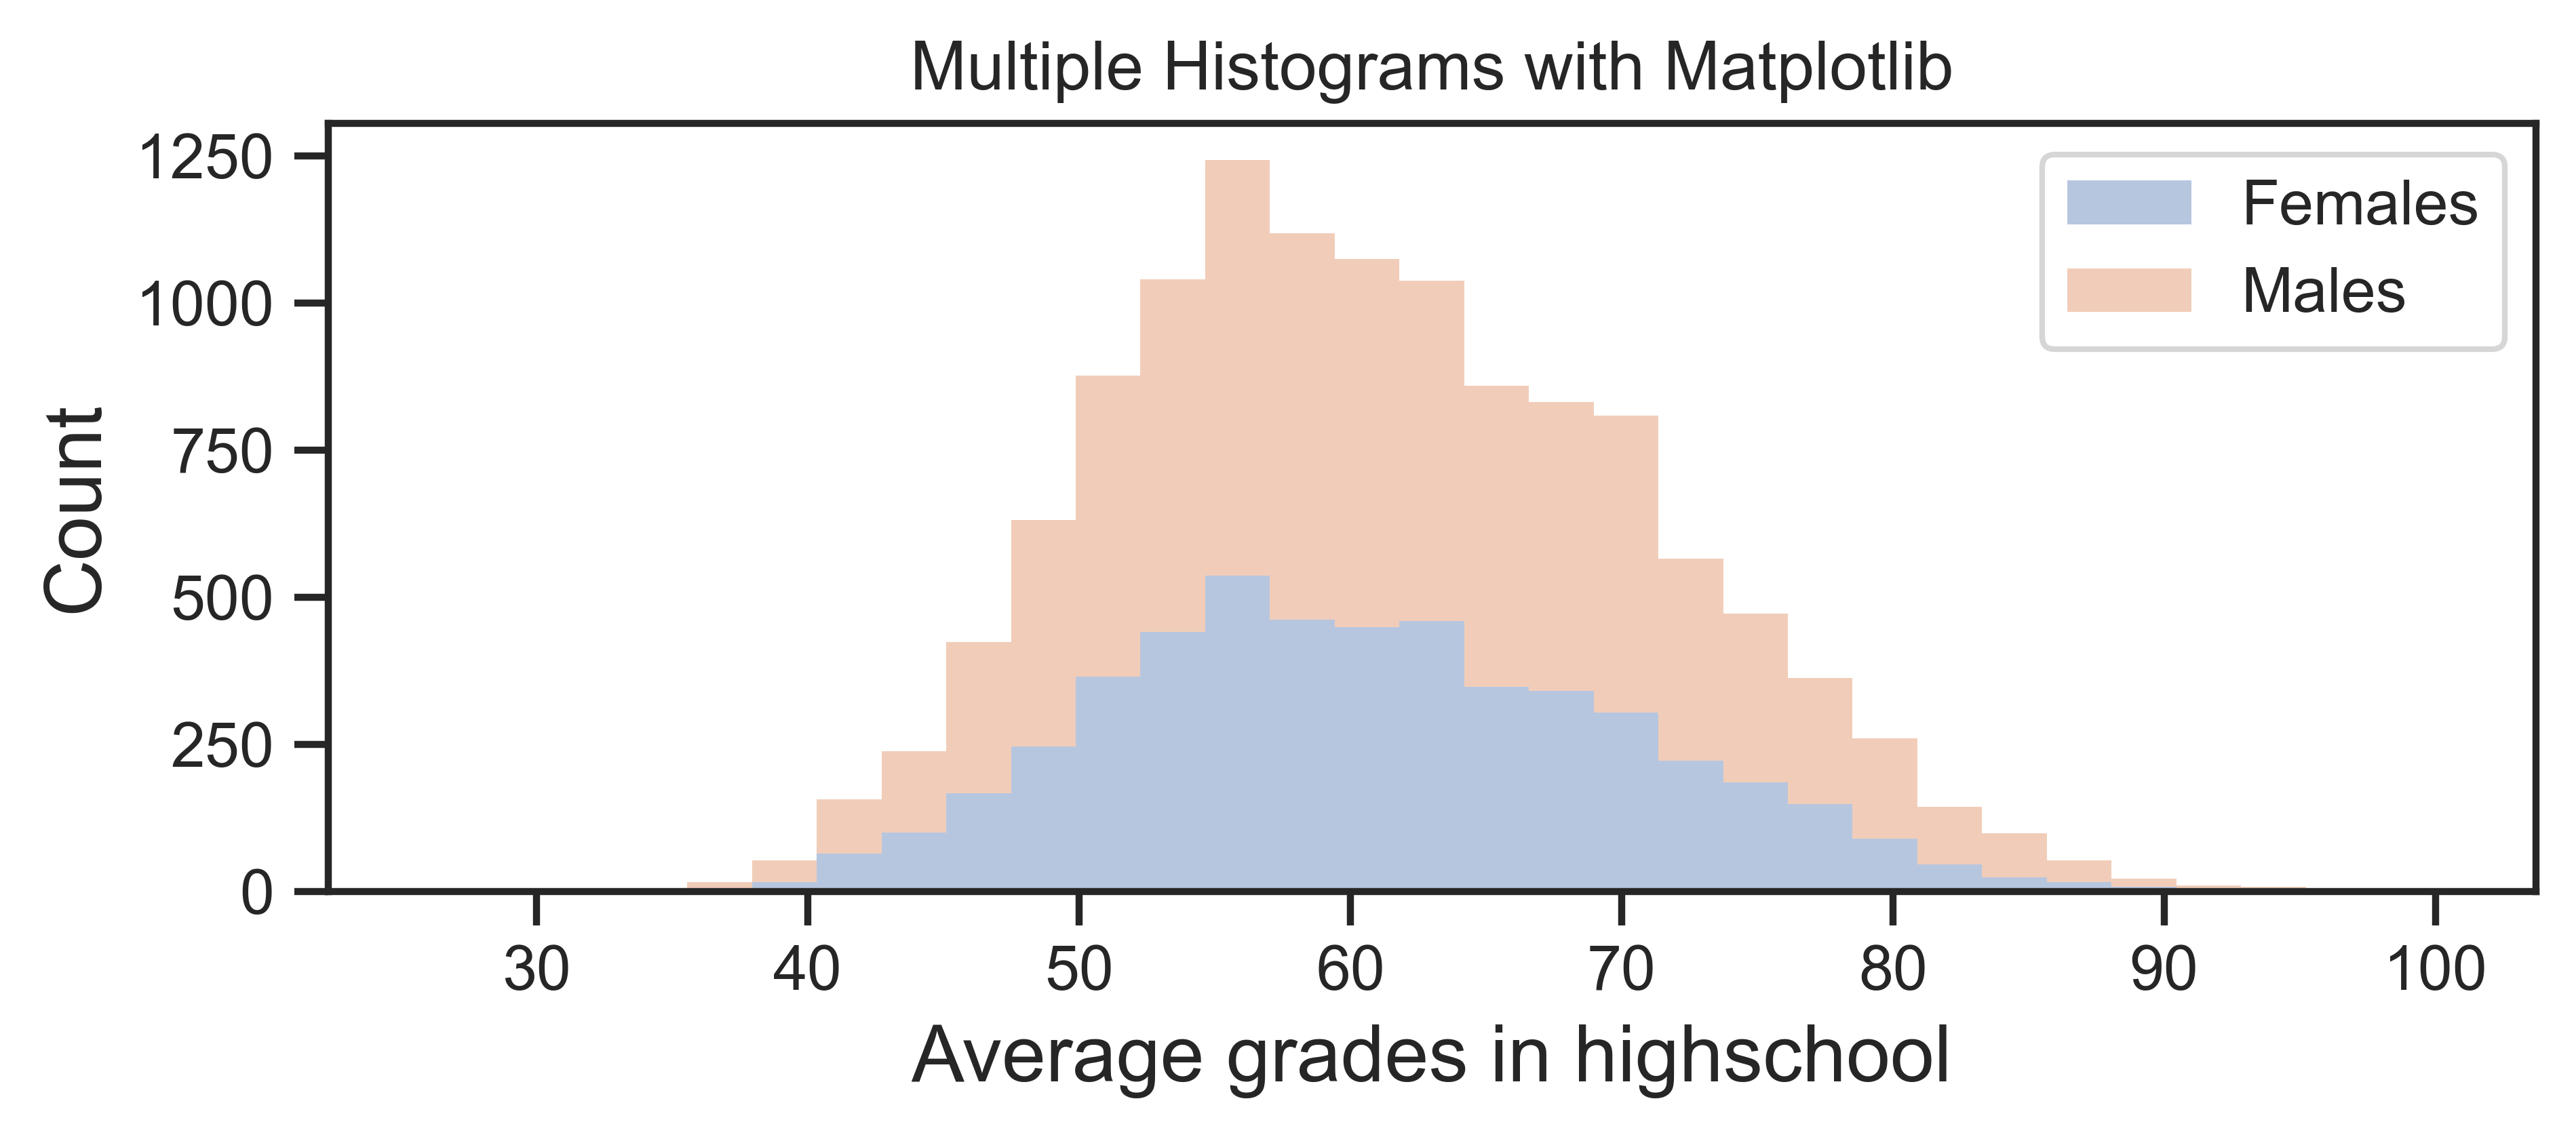

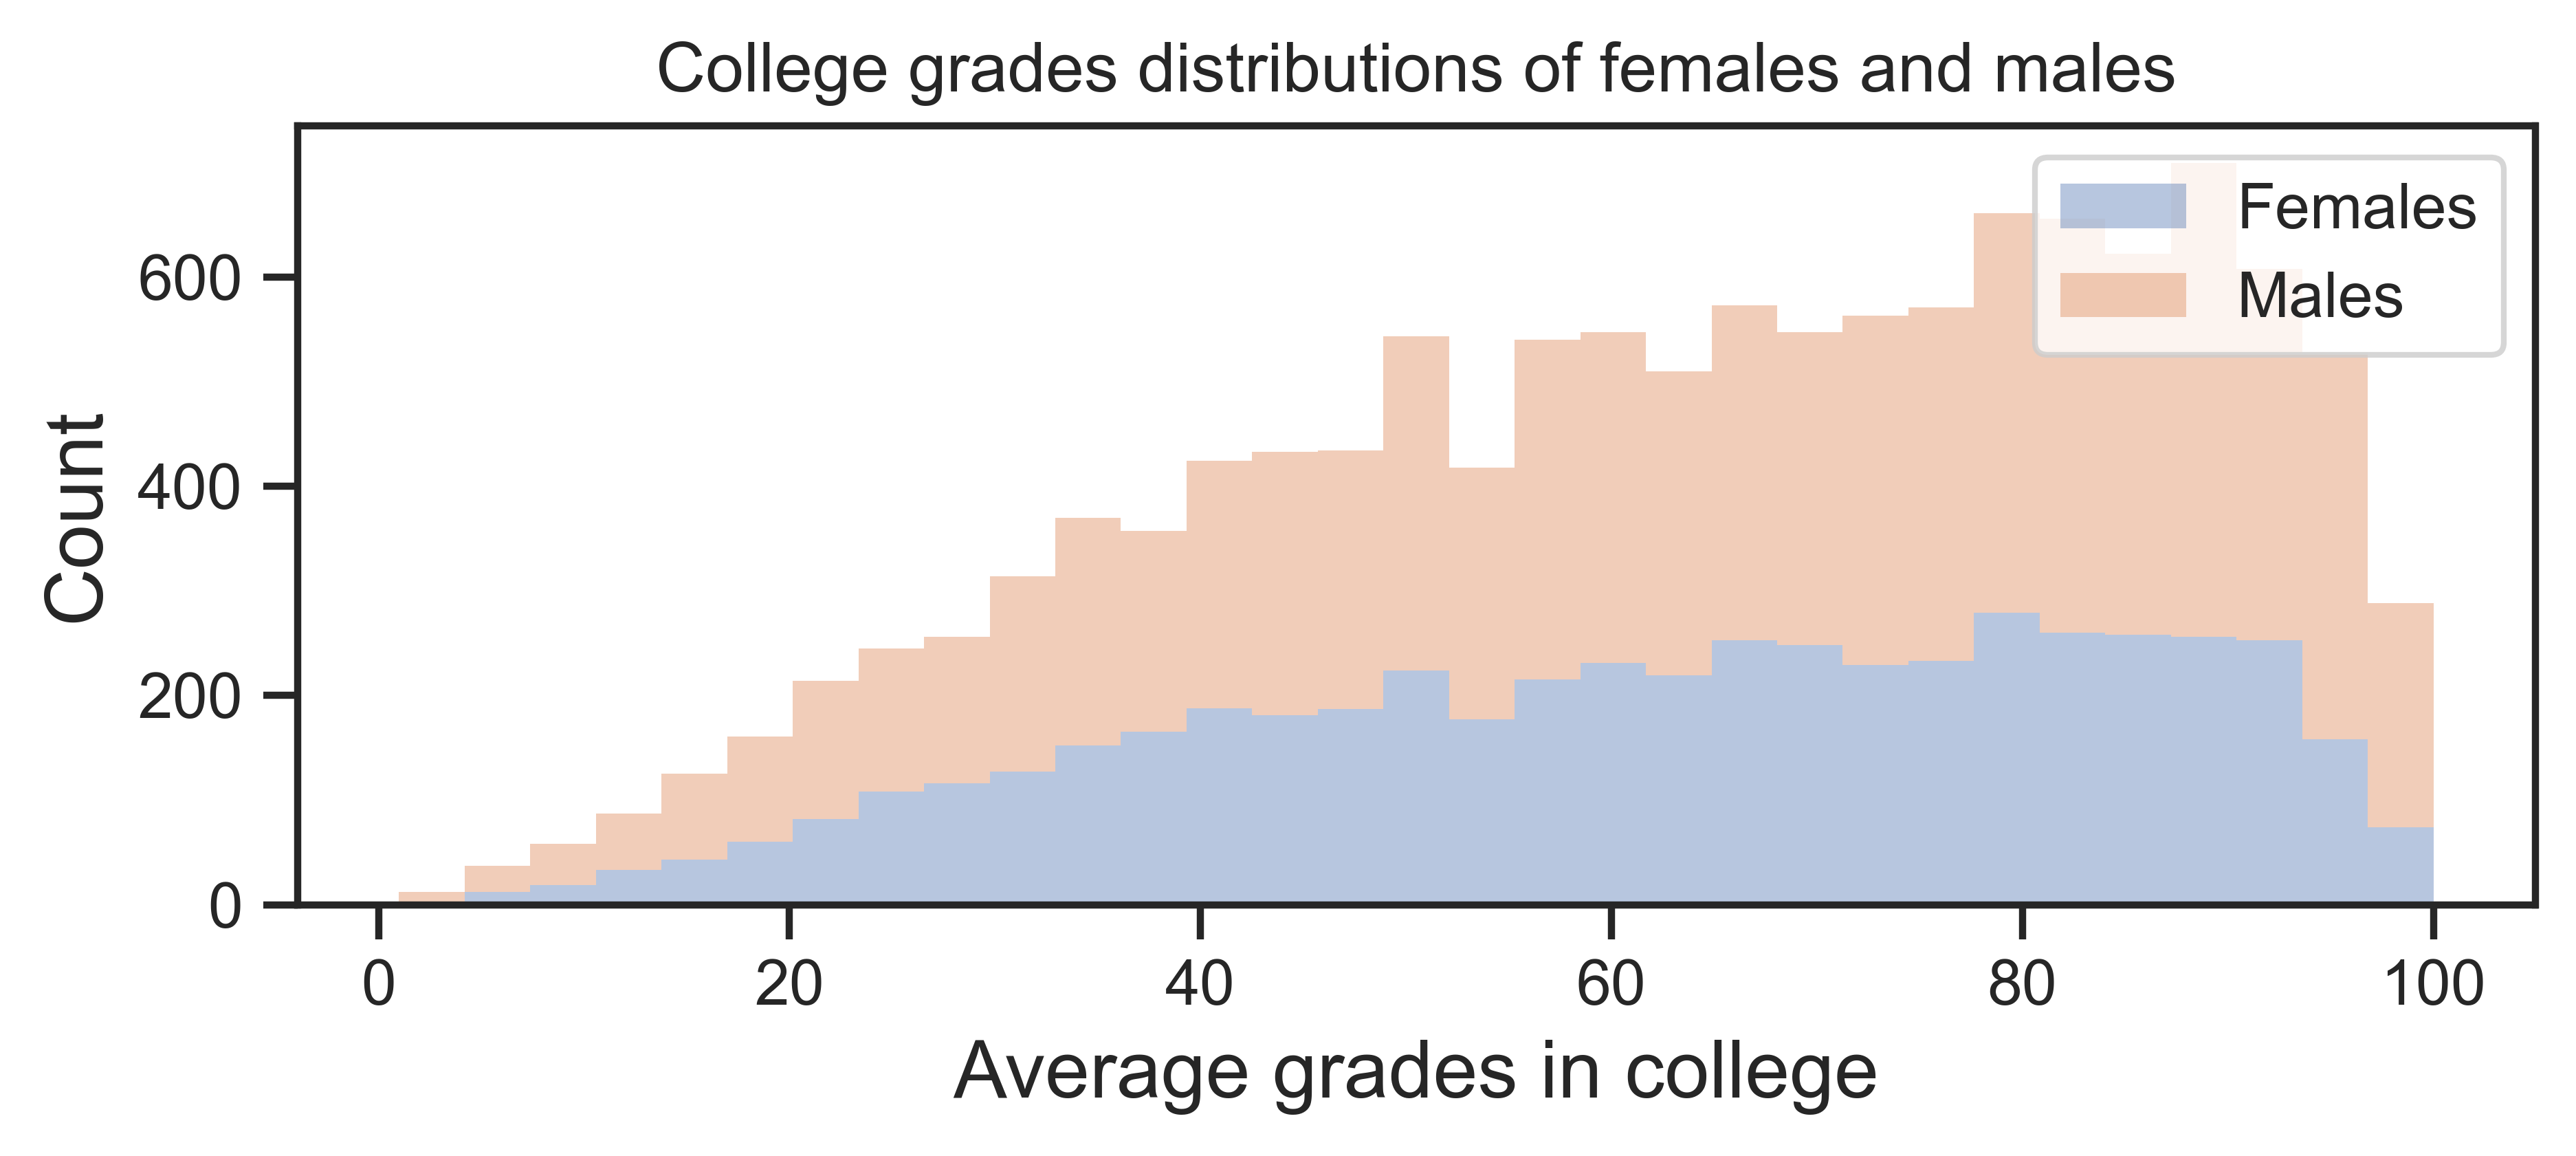

In [10]:
# plt.figure(figsize=(8,6))
sns.set(style='ticks')
men = df[df.GENDER=='M'][['GENDER','HI_GRADE_AVG']]
women = df[df.GENDER=='F'][['GENDER','HI_GRADE_AVG']]
fig,ax = plt.subplots()
plt.hist([women.HI_GRADE_AVG, men.HI_GRADE_AVG], 31, histtype='barstacked', density=False, alpha=0.4, edgecolor='none', label=['Females','Males'])

plt.xlabel("Average grades in highschool", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')


# Men and women college grades average histograms
# plt.figure(figsize=(8,6))
men = df[df.GENDER=='M'][['GENDER','COL_GRADE_AVG']]
women = df[df.GENDER=='F'][['GENDER','COL_GRADE_AVG']]
fig,ax = plt.subplots()
plt.hist([women.COL_GRADE_AVG, men.COL_GRADE_AVG], 31, histtype='barstacked', density=False, alpha=0.4, edgecolor='none', label=['Females','Males'])
#TODO legend added

plt.xlabel("Average grades in college", size=14)
plt.legend()
plt.ylabel("Count", size=14)
plt.title("College grades distributions of females and males")
plt.legend(loc='upper right')
plt.show()

## High school and college grades distributions by socio-economic levels

Vær opmærksom på, at disse ikke viser, hvor mange studerende, der er i hver gruppe. De viser frequnecy af karakterer i hver gruppe. 

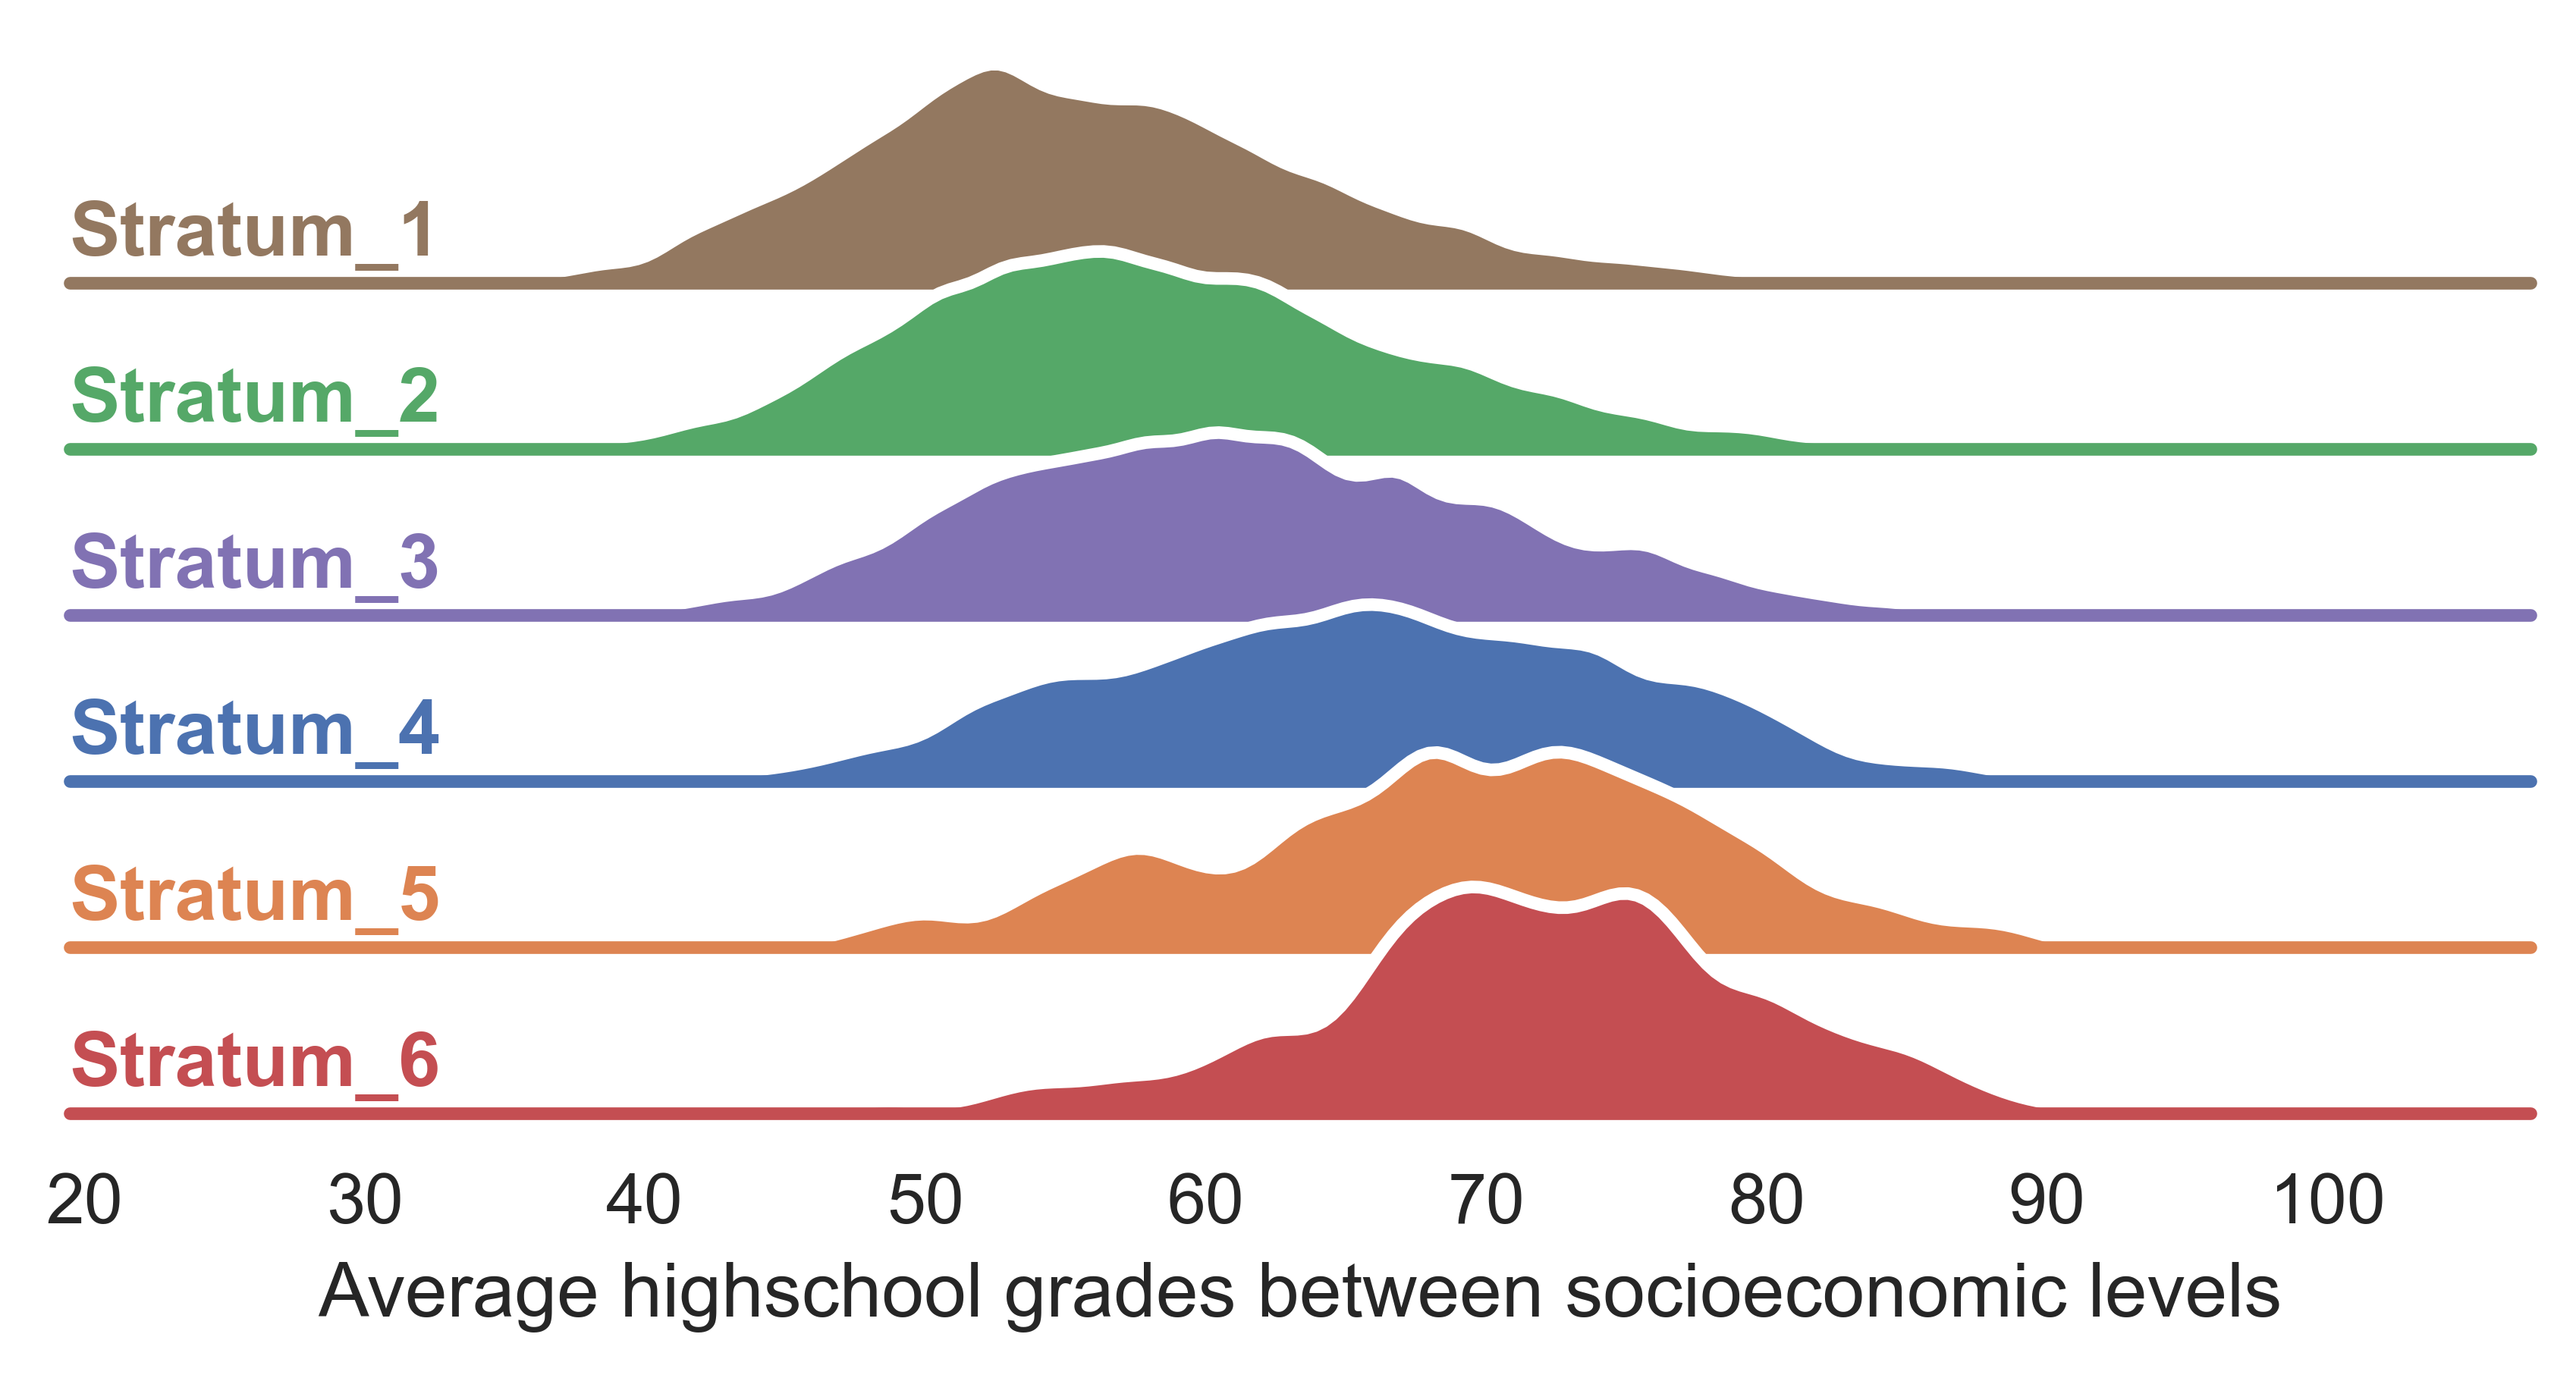

In [11]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# df = pd.read_csv("df_sum_score_ex.csv")
df = df[df.STRATUM!='0']

def Ridgeline_dists(df,x, metric="",plot_label=""):
    df_temp = df.copy()
    x = x 
    g = df_temp.STRATUM
    df_kat = pd.DataFrame(dict(x=x, g=g))
    df_kat_order = df_kat.groupby(["g"]).count()

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
    g = sns.FacetGrid(
        df_kat,
        row="g",
        hue="g",
        aspect=10,
        height=0.8,
        row_order = ['Stratum_1','Stratum_2','Stratum_3','Stratum_4','Stratum_5','Stratum_6'],
        # palette=pal # Denne gør den i de 2 blå farver
    )

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "x", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)#, order =['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=0.5)#,order=['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])
    g.map(plt.axhline, y=0, lw=2, clip_on=False)#, order=['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            0,
            0.2,
            label,
            fontweight="bold",
            color=color,
            ha="left",
            va="center",
            transform=ax.transAxes
        )

    g.map(label, "x")
    
    g.set_xlabels(plot_label)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-0.30)
    g.fig.set_size_inches(6, 3)
    

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    

Ridgeline_dists(df,x=df.HI_GRADE_AVG,plot_label='Average highschool grades between socioeconomic levels')
# Save as a SVG and PNG
plt.savefig("ridgeline_hi_STRATUM.png")

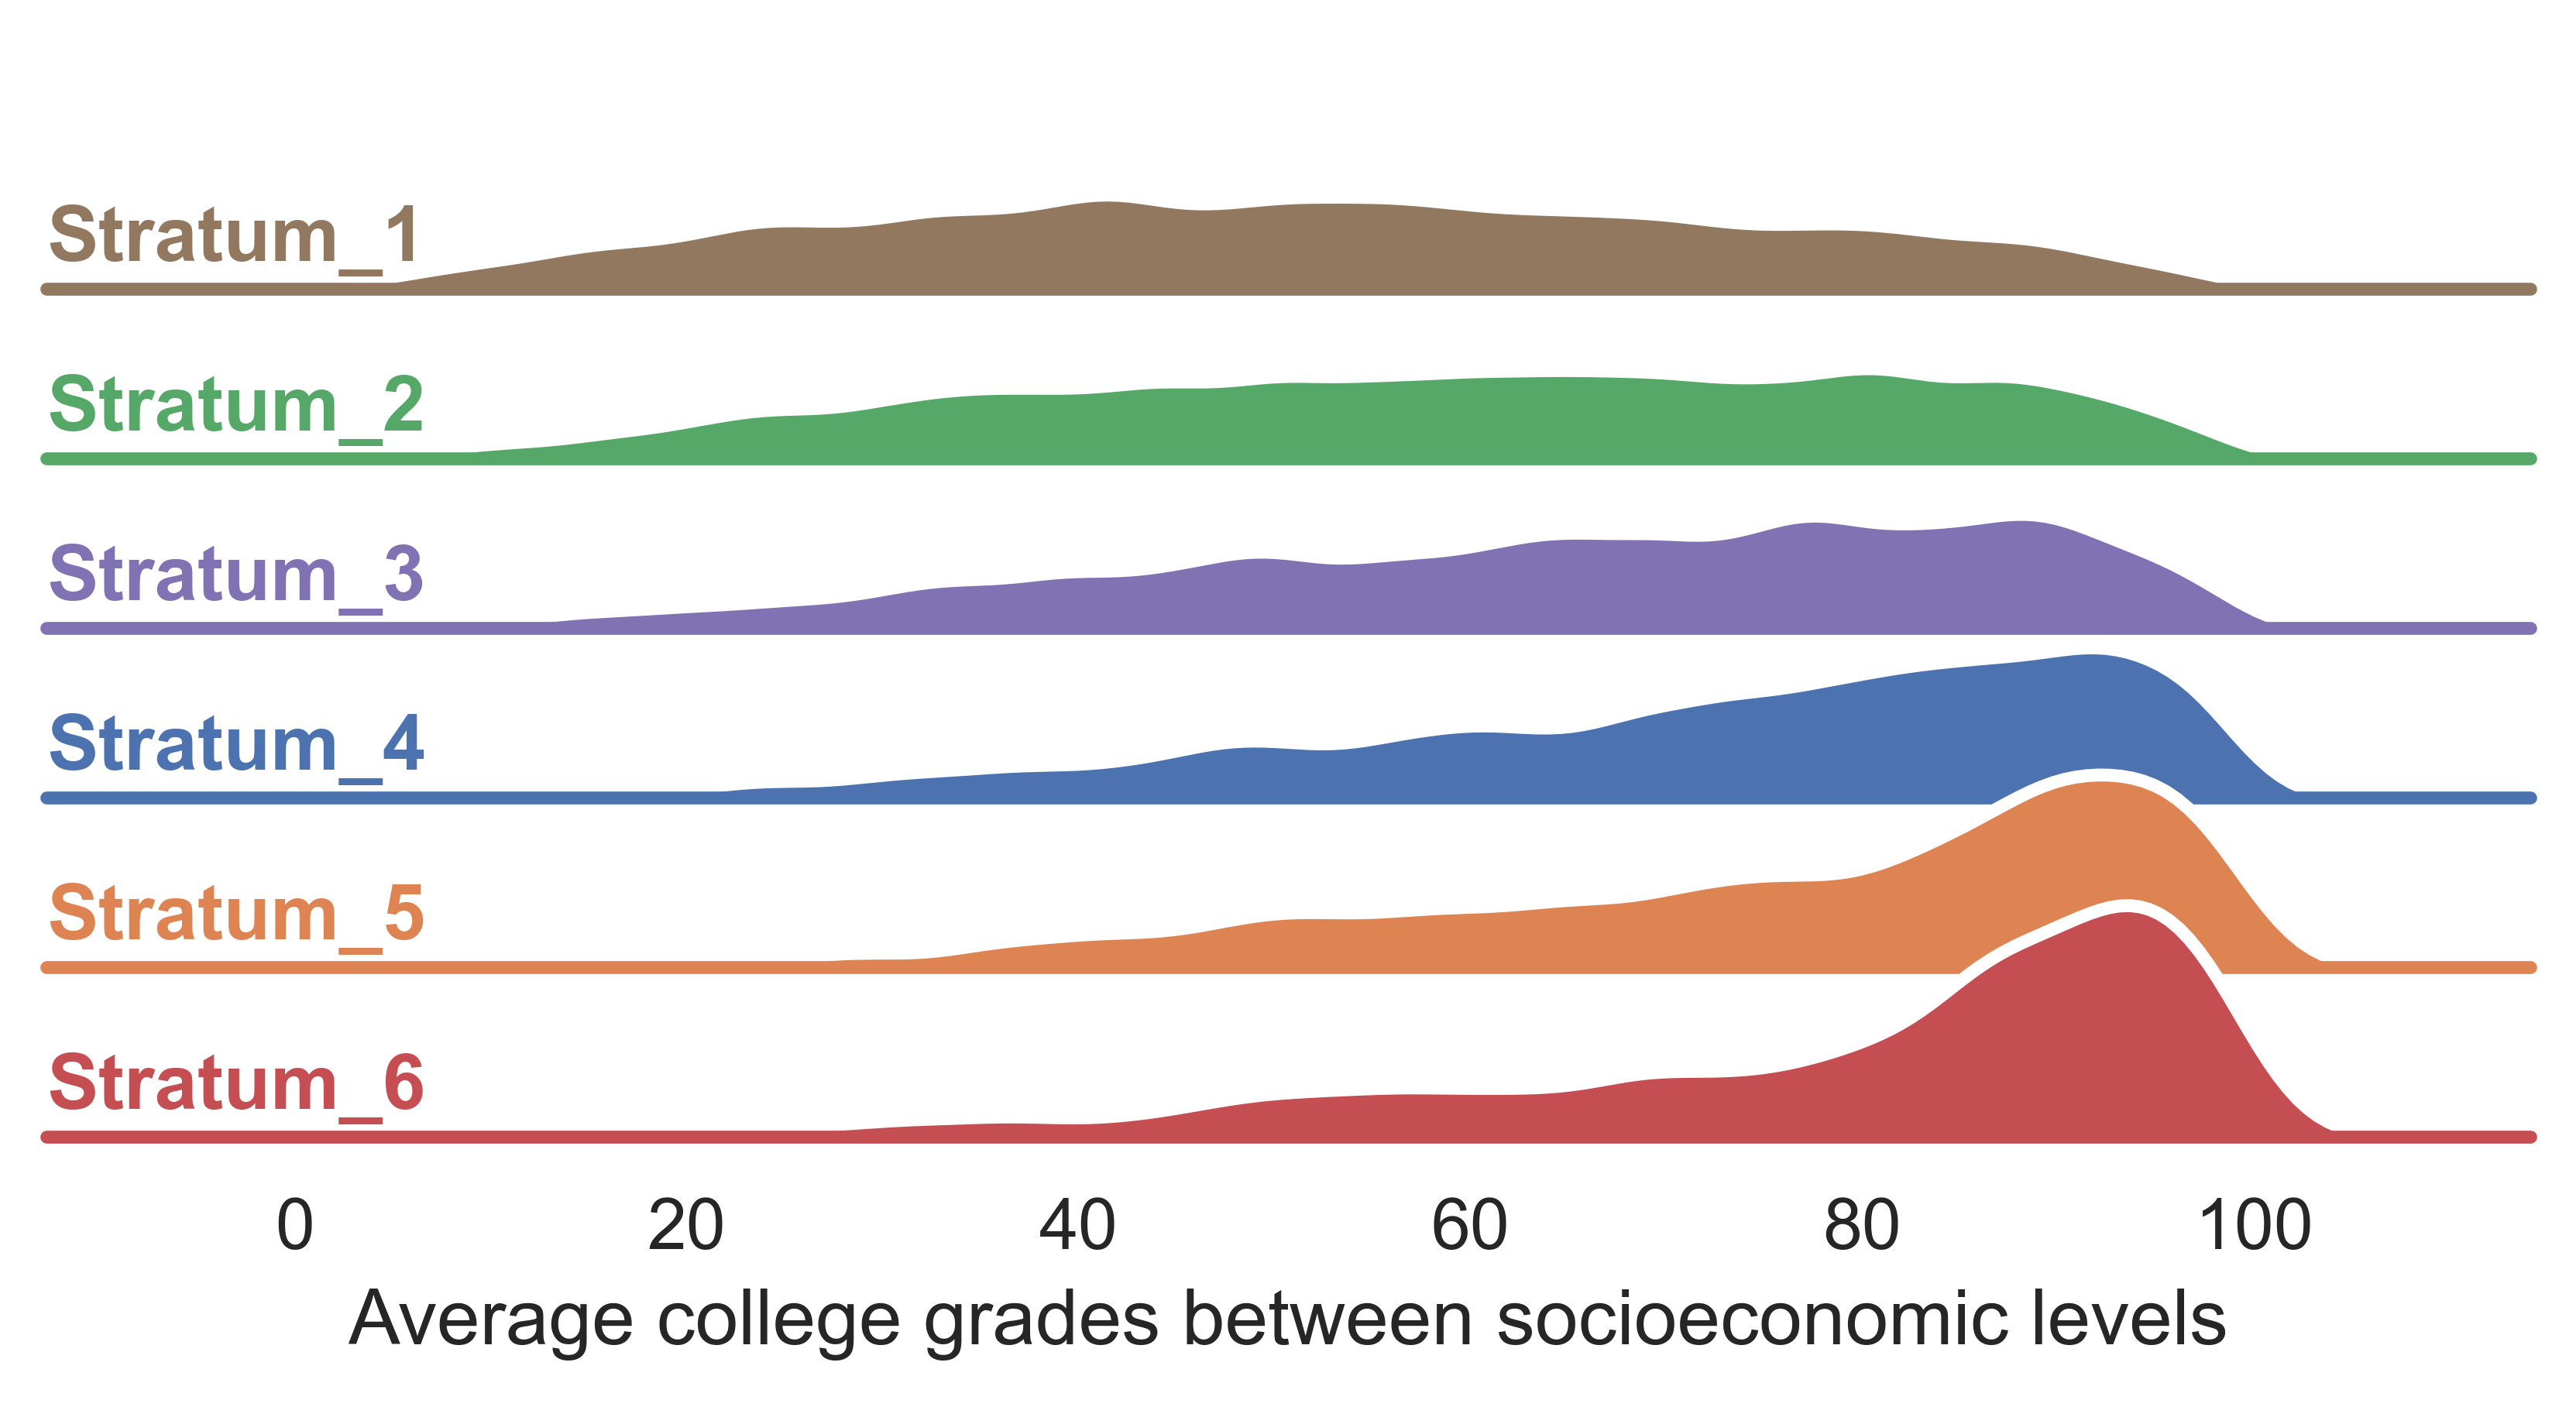

In [12]:
Ridgeline_dists(df,x=df.COL_GRADE_AVG,plot_label='Average college grades between socioeconomic levels')
# Save as a SVG and PNG
plt.savefig("ridgeline_col_STRATUM.png")

In [13]:
# pip install joypy --user #outcomment to install joyplot

In [14]:
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 20
    mpl.rcParams["figure.figsize"] = (10,7)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()


<Figure size 2000x1400 with 0 Axes>

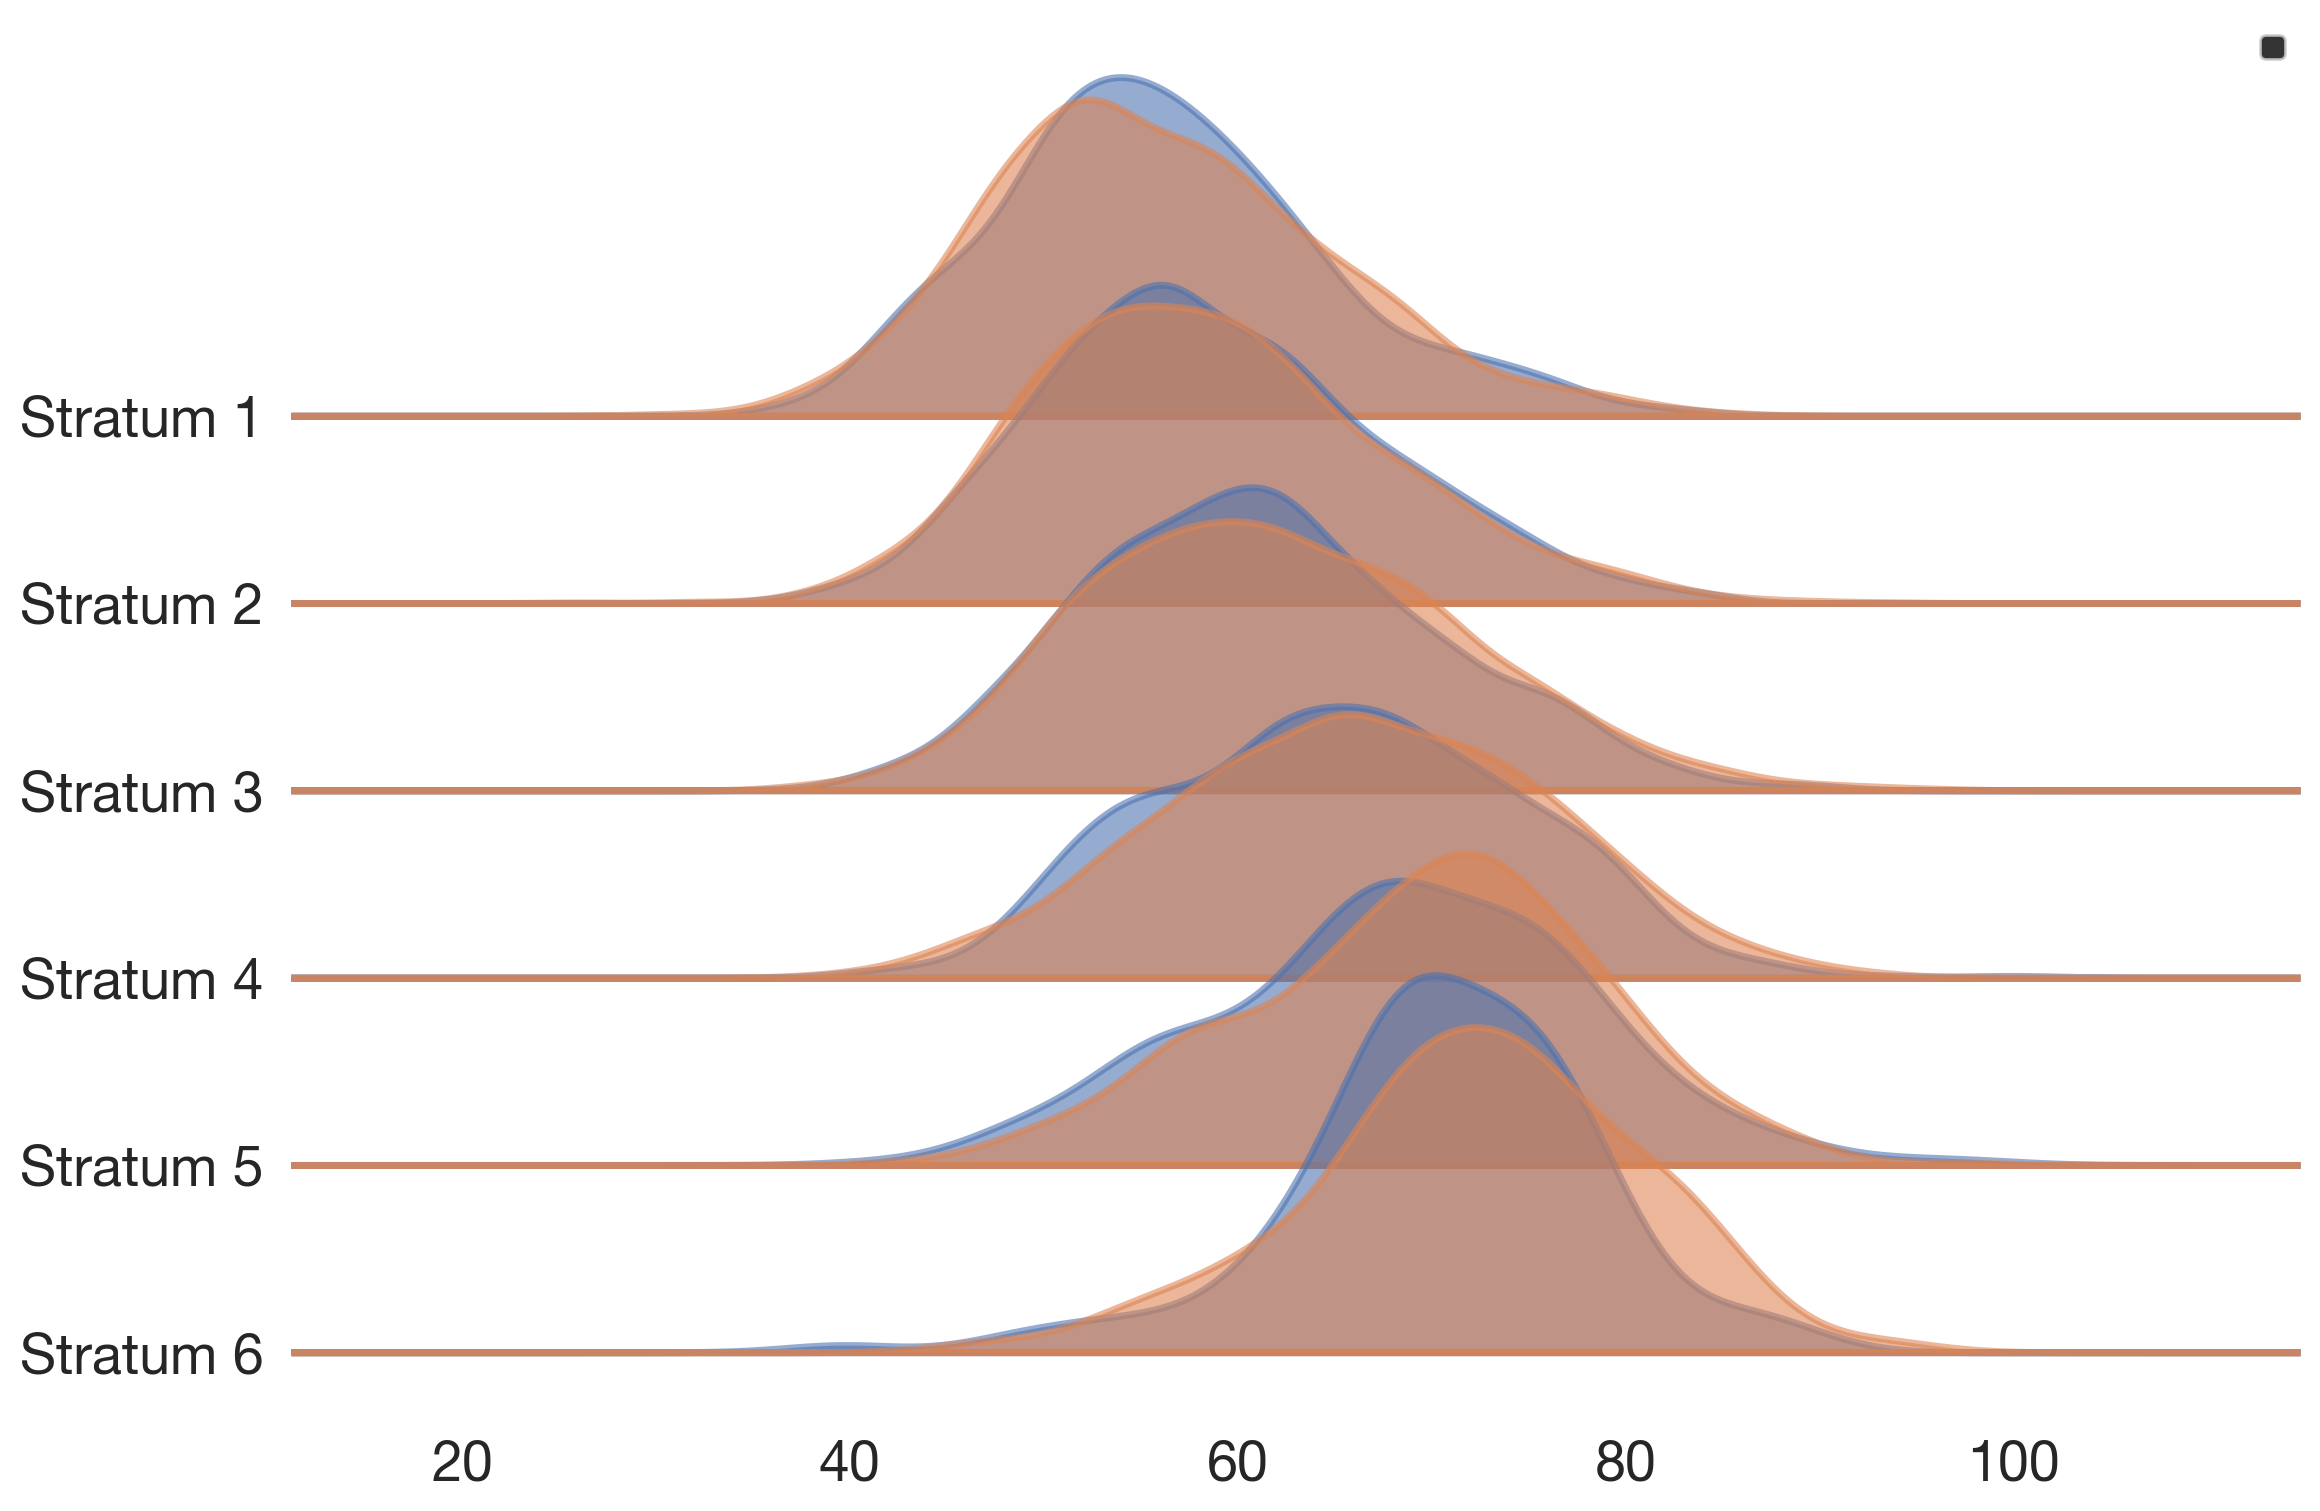

In [15]:
import pandas as pd
import joypy
from matplotlib import cm

# df = pd.read_csv("df_sum_score_ex.csv")
# df['Females'] = df[df['GENDER' == 'F']] 
df_temp = df.copy()
df_temp=df_temp[df_temp.STRATUM != '0']
df_temp["STRATUM"] = df_temp.STRATUM.replace({'_':' '}, regex=True)
df_M = df_temp[df_temp.GENDER_bin == 0]
df_F = df_temp[df_temp.GENDER_bin == 1]
HI_MEN = df_M.HI_GRADE_AVG 
HI_WOM = df_F.HI_GRADE_AVG 
df_temp['HI_WOM'] = HI_WOM
df_temp['HI_MEN'] = HI_MEN
#df = df_temp

plt.figure()

ax, fig = joypy.joyplot(
    data=df_temp[['HI_WOM', 'HI_MEN', 'STRATUM']], 
    by='STRATUM',
    column=['HI_WOM', 'HI_MEN'],
    fill=True, 
    linewidth=2.5, 
    # grid='both', 
    # figsize=(7,7),
    # color=['orange', '#eb4d4b'],
    # linewidth=1.5,
    # legend=True,
    alpha=0.59,
    linecolor='None',
    # colormap=cm.autumn,
    # Mode = True,
    figsize=(12, 8)
)
plt.legend(["Females",'Males'], loc ="upper right")

#plt.title('High School GPA of females and males', fontsize=27)
plt.show()


<Figure size 2000x1400 with 0 Axes>

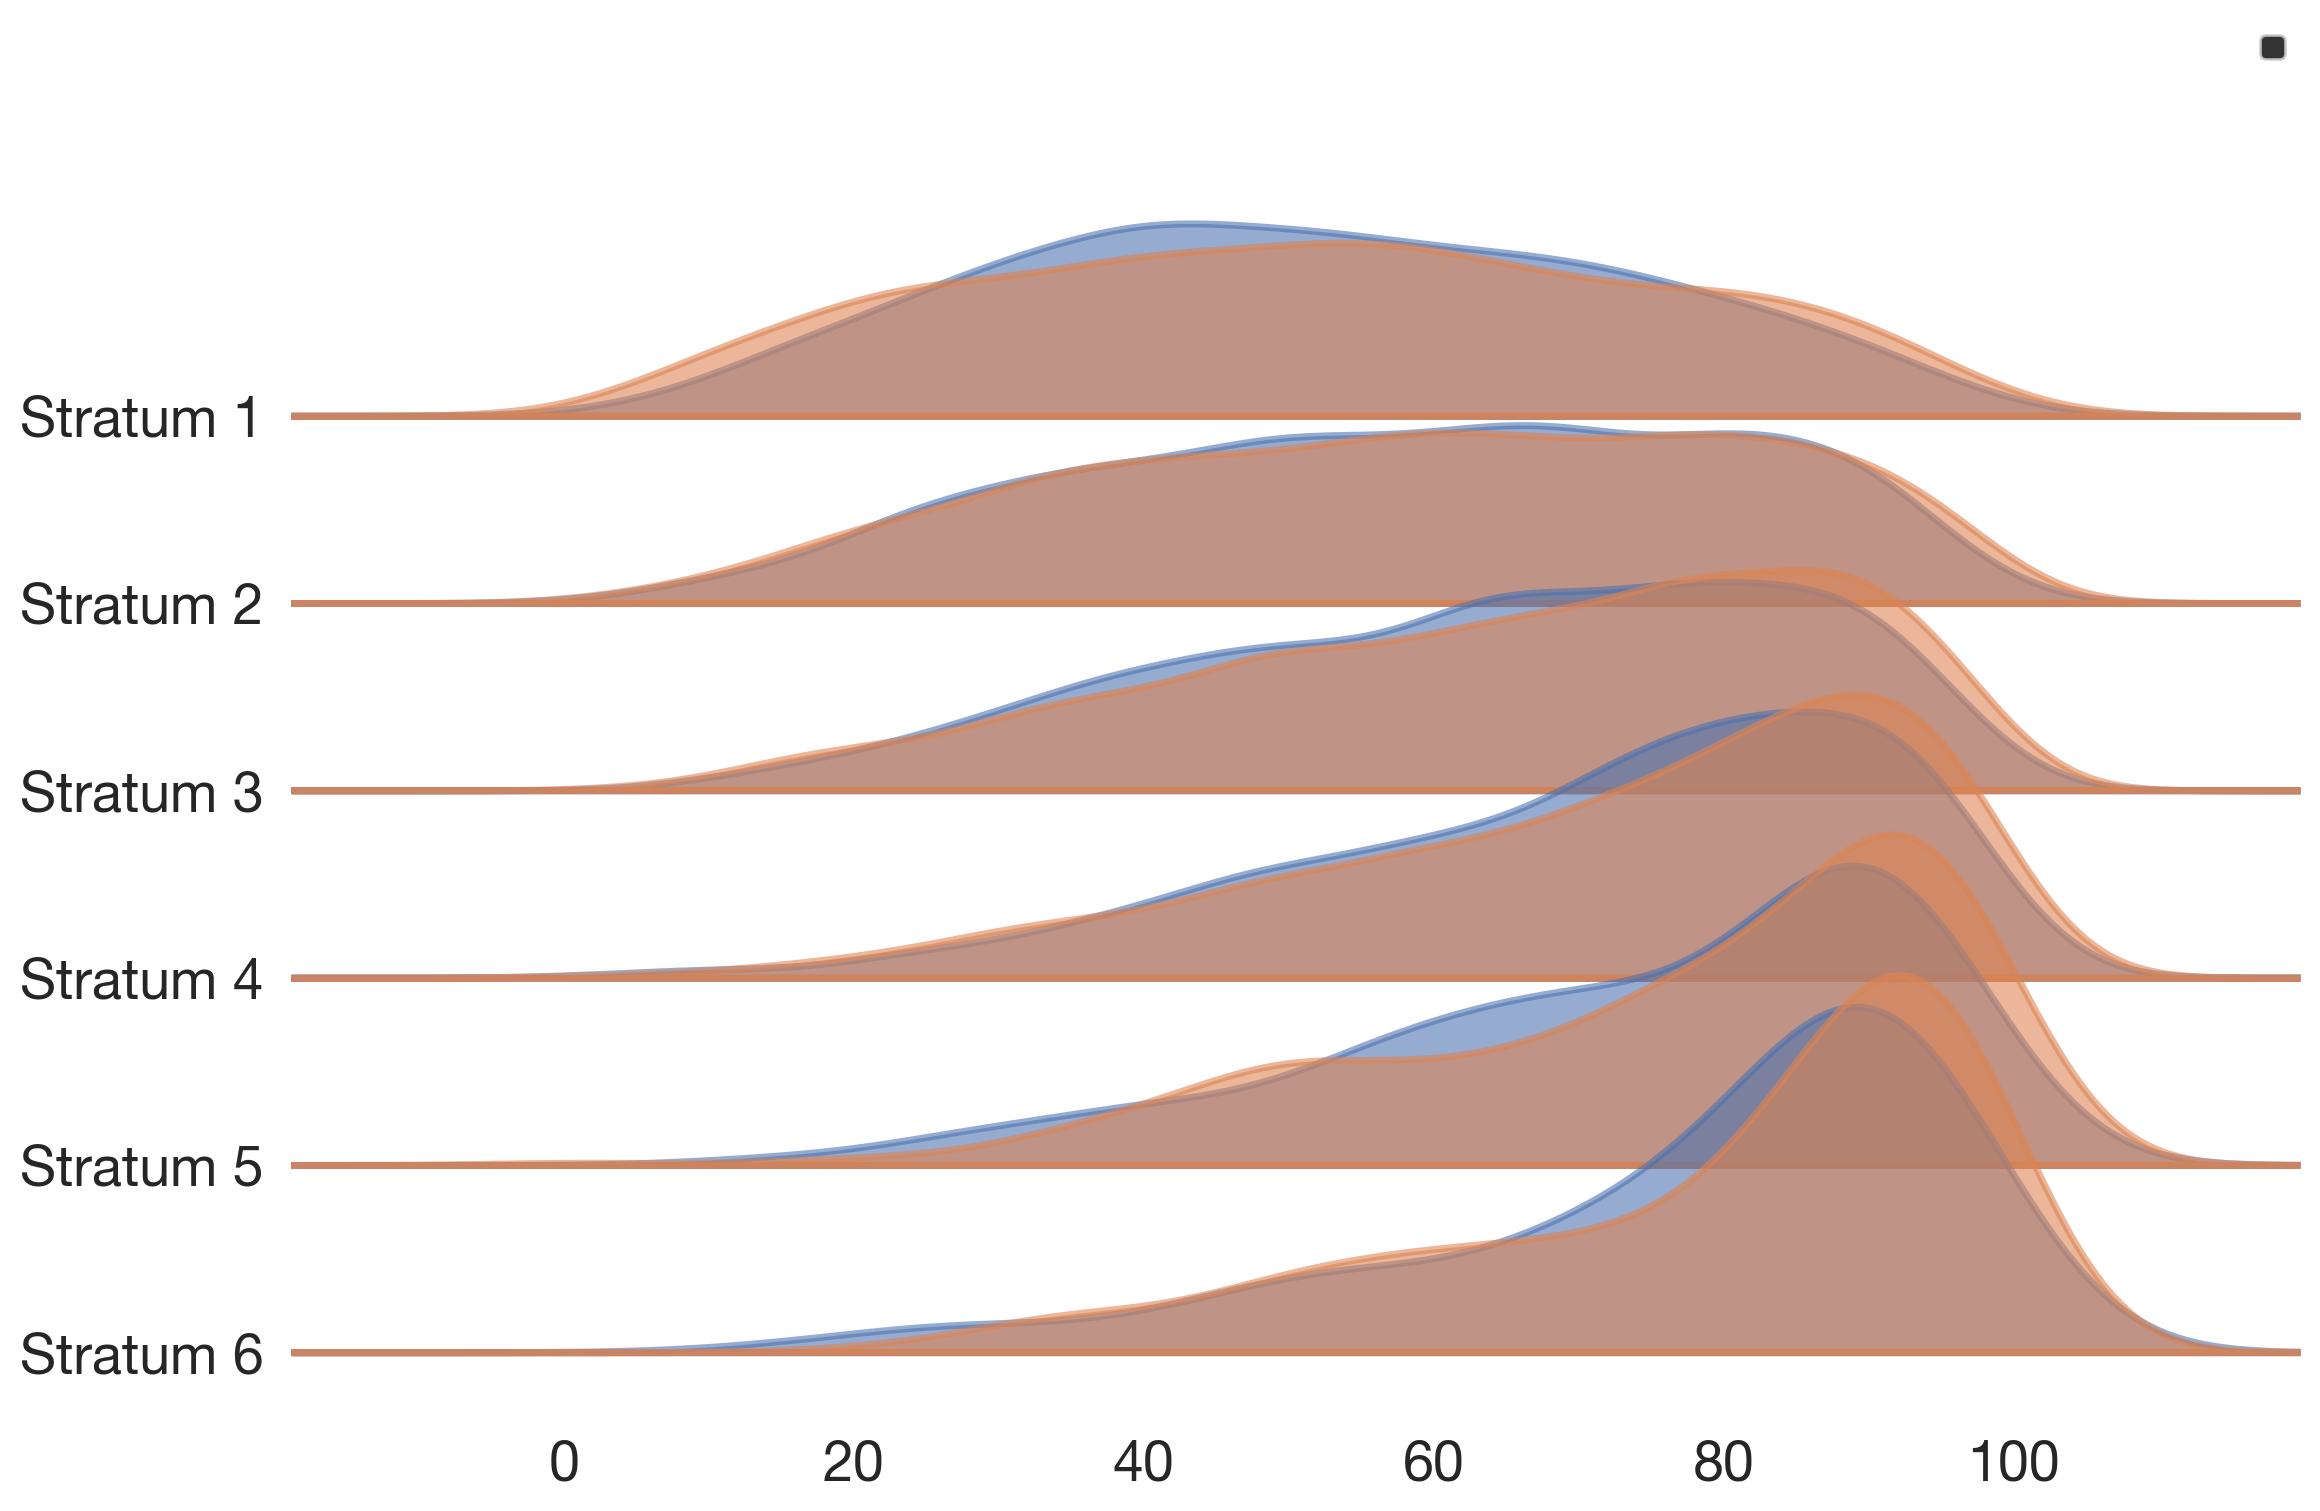

In [16]:
import pandas as pd
import joypy

# df = pd.read_csv("df_sum_score_ex.csv")
# df['Females'] = df[df['GENDER' == 'F']] 
df_temp = df.copy()
df_temp["STRATUM"] = df_temp.STRATUM.replace({'_':' '}, regex=True)
df_temp=df_temp[df_temp.STRATUM != '0']
df_M = df_temp[df_temp.GENDER_bin == 0]
df_F = df_temp[df_temp.GENDER_bin == 1]
HI_MEN = df_M.COL_GRADE_AVG 
HI_WOM = df_F.COL_GRADE_AVG 
df_temp['COL_WOM'] = HI_WOM
df_temp['COL_MEN'] = HI_MEN
#df = df_temp

plt.figure()

ax, fig = joypy.joyplot(
    data=df_temp[['COL_WOM', 'COL_MEN', 'STRATUM']], 
    by='STRATUM',
    column=['COL_WOM', 'COL_MEN'],
    fill=True, 
    linewidth=2.5, 
    # grid='both', 
    # figsize=(7,7),
    # color=['orange', '#eb4d4b'],
    # linewidth=1.5,
    # legend=True,
    alpha=0.59,
    linecolor='None',
    # colormap=cm.autumn,
    # Mode = True,
    figsize=(12, 8)
)
plt.legend(["Females",'Males'], loc ="upper right")

#plt.title('College GPA of females and males', fontsize=20)
plt.show()


## Distribution of grades by gender & socio-economic level (before and after college)

In [17]:
# Create subset of dataframe to use for plot
df = df.copy()
# df = df_norm.copy()
# df = df_stand.copy()

df_gen_soc_hc = df[['HI_GRADE_AVG', 'COL_GRADE_AVG', 'GENDER', 'STRATUM']]

# Columns are renamed to use in plot
df_gen_soc_hc = df_gen_soc_hc.rename(columns = {"HI_GRADE_AVG":"HI", "COL_GRADE_AVG":"COL"})

In [18]:
# Create dataframe with one column of both "HI" and "COL" and another column with respective average HI or COL grade
 # There will be 2*rows of the original df as there will be a "HI" and "COL" for each candidate
df_try = pd.melt(df_gen_soc_hc, id_vars=['GENDER', 'STRATUM']) 
df_try = df_try.rename(columns={"variable":"Average_grade"}) # rename columns to use for plot

#Show dataframe used for plotting
#df_try

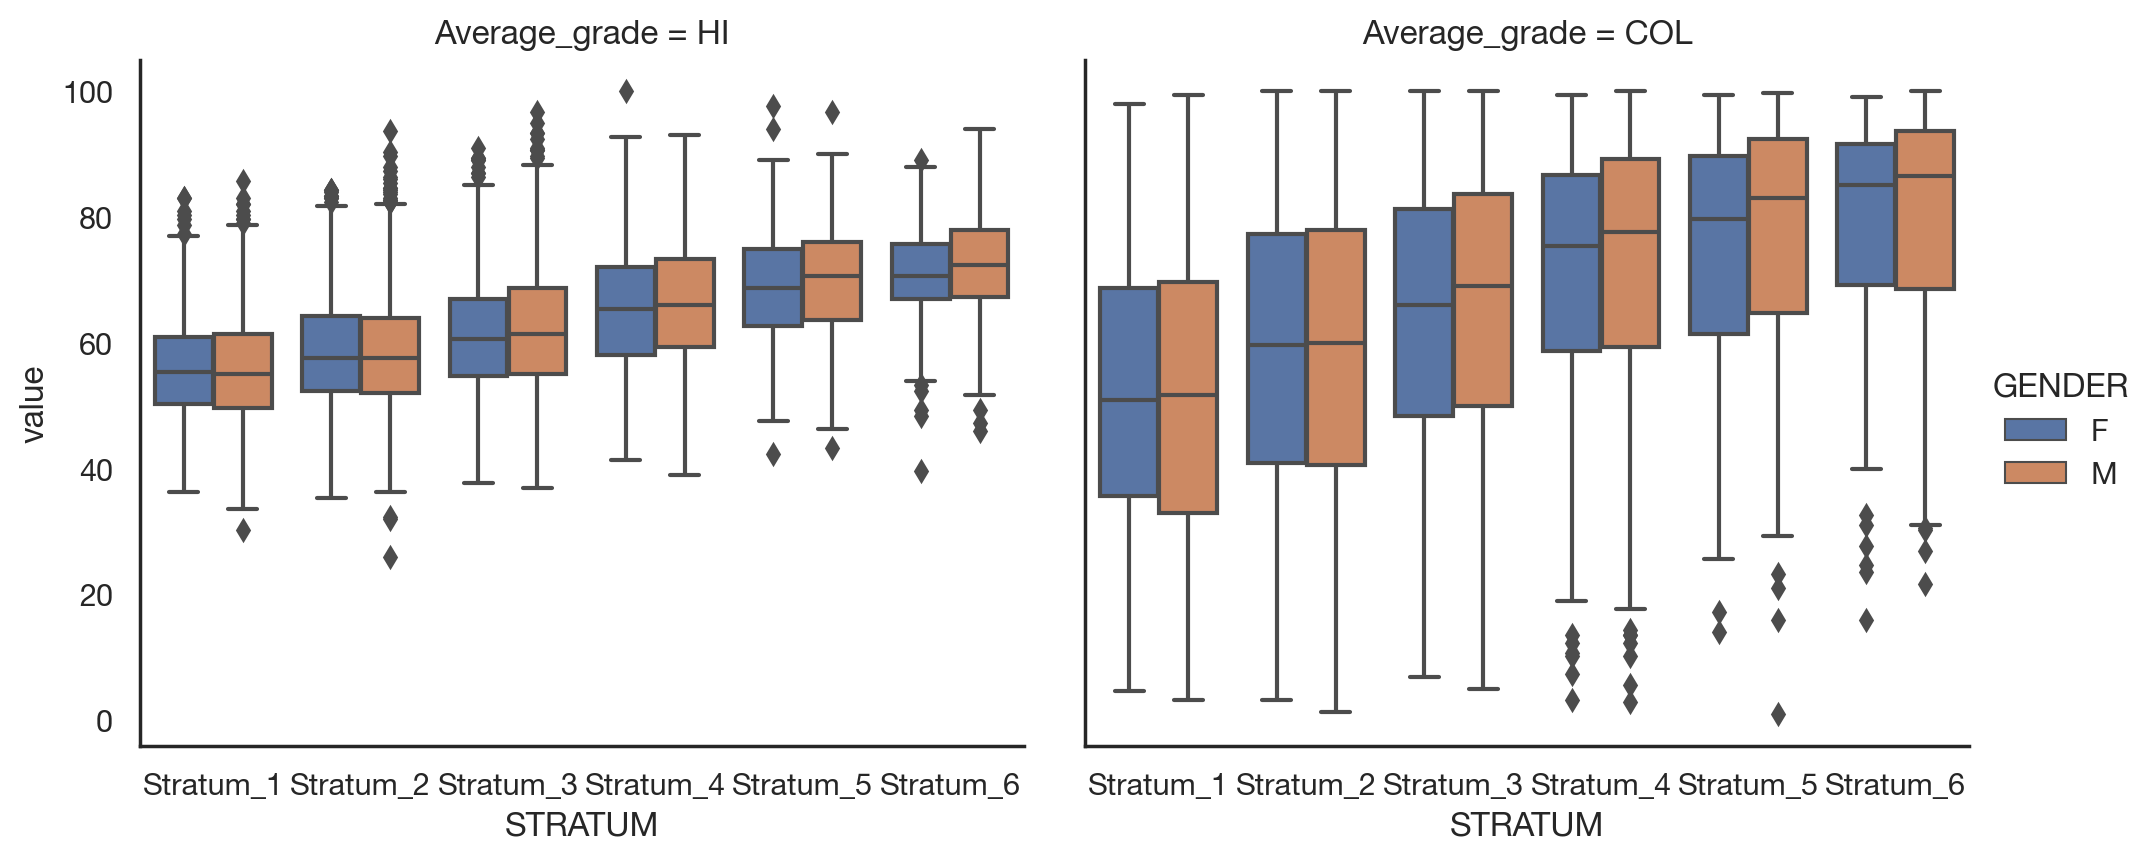

In [19]:
#Plot grouped boxplot of Males and Females, per stratum, in two figures for before college and after college.
b = sns.catplot(data=df_try, x='STRATUM', y='value', 
               hue='GENDER', col='Average_grade',
               kind='box', legend=True, order=["Stratum_1", "Stratum_2", "Stratum_3", "Stratum_4", "Stratum_5", "Stratum_6"])

b.fig.subplots_adjust(top=.8)
#b.fig.suptitle('Boxplot of Average Grade Before and After College', size=20)

#plt.xlabel(" ")

# Save as a SVG and PNG
plt.savefig("box_plot_gender_STRATUM.png")
plt.show()


In [20]:
#Table of stratum information to latex

denne = df_try.groupby(['GENDER','Average_grade','STRATUM']).agg(['mean', 'median', 'std', 'count'])
#print(denne.to_latex(index=False)) 
#print(denne)


In [21]:
#Print table

#df_try.groupby(['GENDER','Average_grade']).agg(['mean', 'median', 'std', 'count'])


In [22]:
df_samlet = df_try.groupby(['STRATUM']).agg(['mean', 'median', 'std', 'count'])
df_samlet = df_samlet.value
#df_samlet['count']/2

In [23]:
#df_try['STRATUM'].value_counts(normalize=True)*100

## T-test

- t-test for high school GPA distributions of men and women
- kruskals willis for college GPA distributions of men and women


- Anova for stratum gender 


In [24]:
from scipy.stats import ttest_ind

df_temp = df.copy()
AvgMal = df_temp[df_temp.GENDER_bin == 0]
male = AvgMal.HI_GRADE_AVG

AvgFem = df_temp[df_temp.GENDER_bin == 1]
female = AvgFem.HI_GRADE_AVG
print(ttest_ind(female, male))

Ttest_indResult(statistic=-3.0630350067852383, pvalue=0.0021957433564993157)


In [25]:
from scipy.stats import ttest_ind
# ttest_ind(df.groupby('STRATUM')['HI_GRADE_AVG'].apply(lambda x:list(x)))

stra1 = df[df['STRATUM']=='Stratum_1']
stra2 = df[df['STRATUM']=='Stratum_2']
stra3 = df[df['STRATUM']=='Stratum_3']
stra4 = df[df['STRATUM']=='Stratum_4']
stra5 = df[df['STRATUM']=='Stratum_5']
stra6 = df[df['STRATUM']=='Stratum_6']

#Run this to print t-tets

# ttest_ind(stra2['HI_GRADE_AVG'], stra4['HI_GRADE_AVG'])
#print(ttest_ind(stra1['HI_GRADE_AVG'], stra2['HI_GRADE_AVG']))
#print(ttest_ind(stra2['HI_GRADE_AVG'], stra3['HI_GRADE_AVG']))
#print(ttest_ind(stra3['HI_GRADE_AVG'], stra4['HI_GRADE_AVG']))
#print(ttest_ind(stra1['HI_GRADE_AVG'], stra6['HI_GRADE_AVG']))



## Kruskal wallis

Kruskal wallis uses alpha = 0.5
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.kruskalwallis.html?highlight=difference

In [26]:
from scipy import stats

strats = [stra1, stra2, stra3, stra4, stra5, stra6]



# for HI
HI_list_of_ps_kruskal = []
for i in strats:
    for j in strats:
        HI_list_of_ps_kruskal.append(stats.kruskal(i.HI_GRADE_AVG, j.HI_GRADE_AVG)[1])
mat_HI = np.array(HI_list_of_ps_kruskal).reshape(6,6)

# for COL
COL_list_of_ps_kruskal = []
for i in strats:
    for j in strats:
        COL_list_of_ps_kruskal.append(stats.kruskal(i.COL_GRADE_AVG, j.COL_GRADE_AVG)[1])
mat_COL = np.array(COL_list_of_ps_kruskal).reshape(6,6)


In [27]:
#Run this to show kruskal wallis test on each strata distribution in table - HI
HI_df_kruskal_strata = pd.DataFrame(data=mat_HI, columns = ["stratum 1", "stratum 2", "stratum 3", "stratum 4", "stratum 5", "stratum 6"])

In [28]:
HI_df_kruskal_strata.index += 1 

In [29]:
#Run this to show kruskal wallis test on each strata distribution in table - COL
COL_df_kruskal_strata = pd.DataFrame(data=mat_COL, columns = ["stratum 1", "stratum 2", "stratum 3", "stratum 4", "stratum 5", "stratum 6"])

In [30]:
COL_df_kruskal_strata.index += 1 

In [31]:
#Save to latex table
#print(HI_df_kruskal_strata.to_latex(index=False)) # HI to latex

In [32]:
#Save to latex table
#print(COL_df_kruskal_strata.to_latex(index=False)) # COL to latex

## QQ-plots

In [33]:
#pip install statsmodels

In [34]:
HI = df_try[df_try.Average_grade == 'HI']
FE_HI = HI[HI.GENDER == 'F']
MA_HI = HI[HI.GENDER == 'M']

COL = df_try[df_try.Average_grade == 'COL']
FE_COL = COL[COL.GENDER == 'F']
MA_COL = COL[COL.GENDER == 'M']
# HI[HI.STRATUM=='Stratum_1' ]

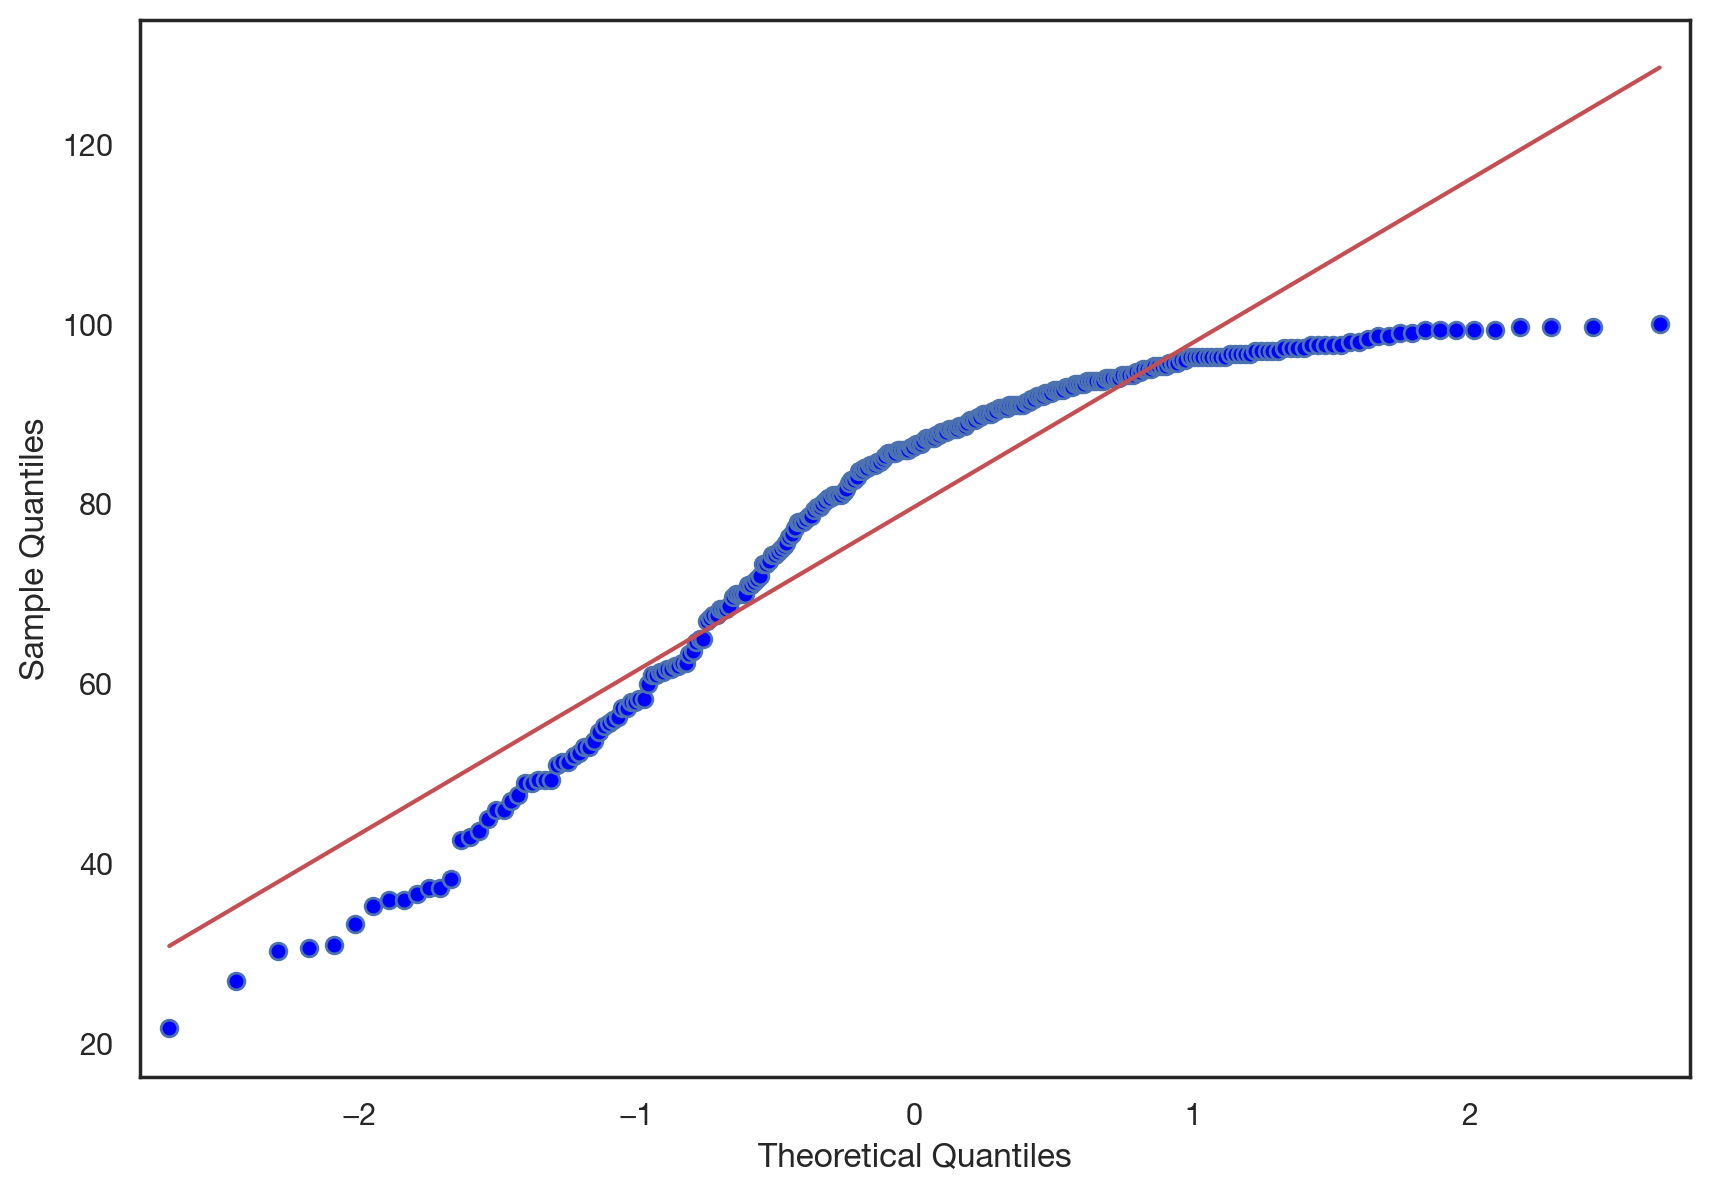

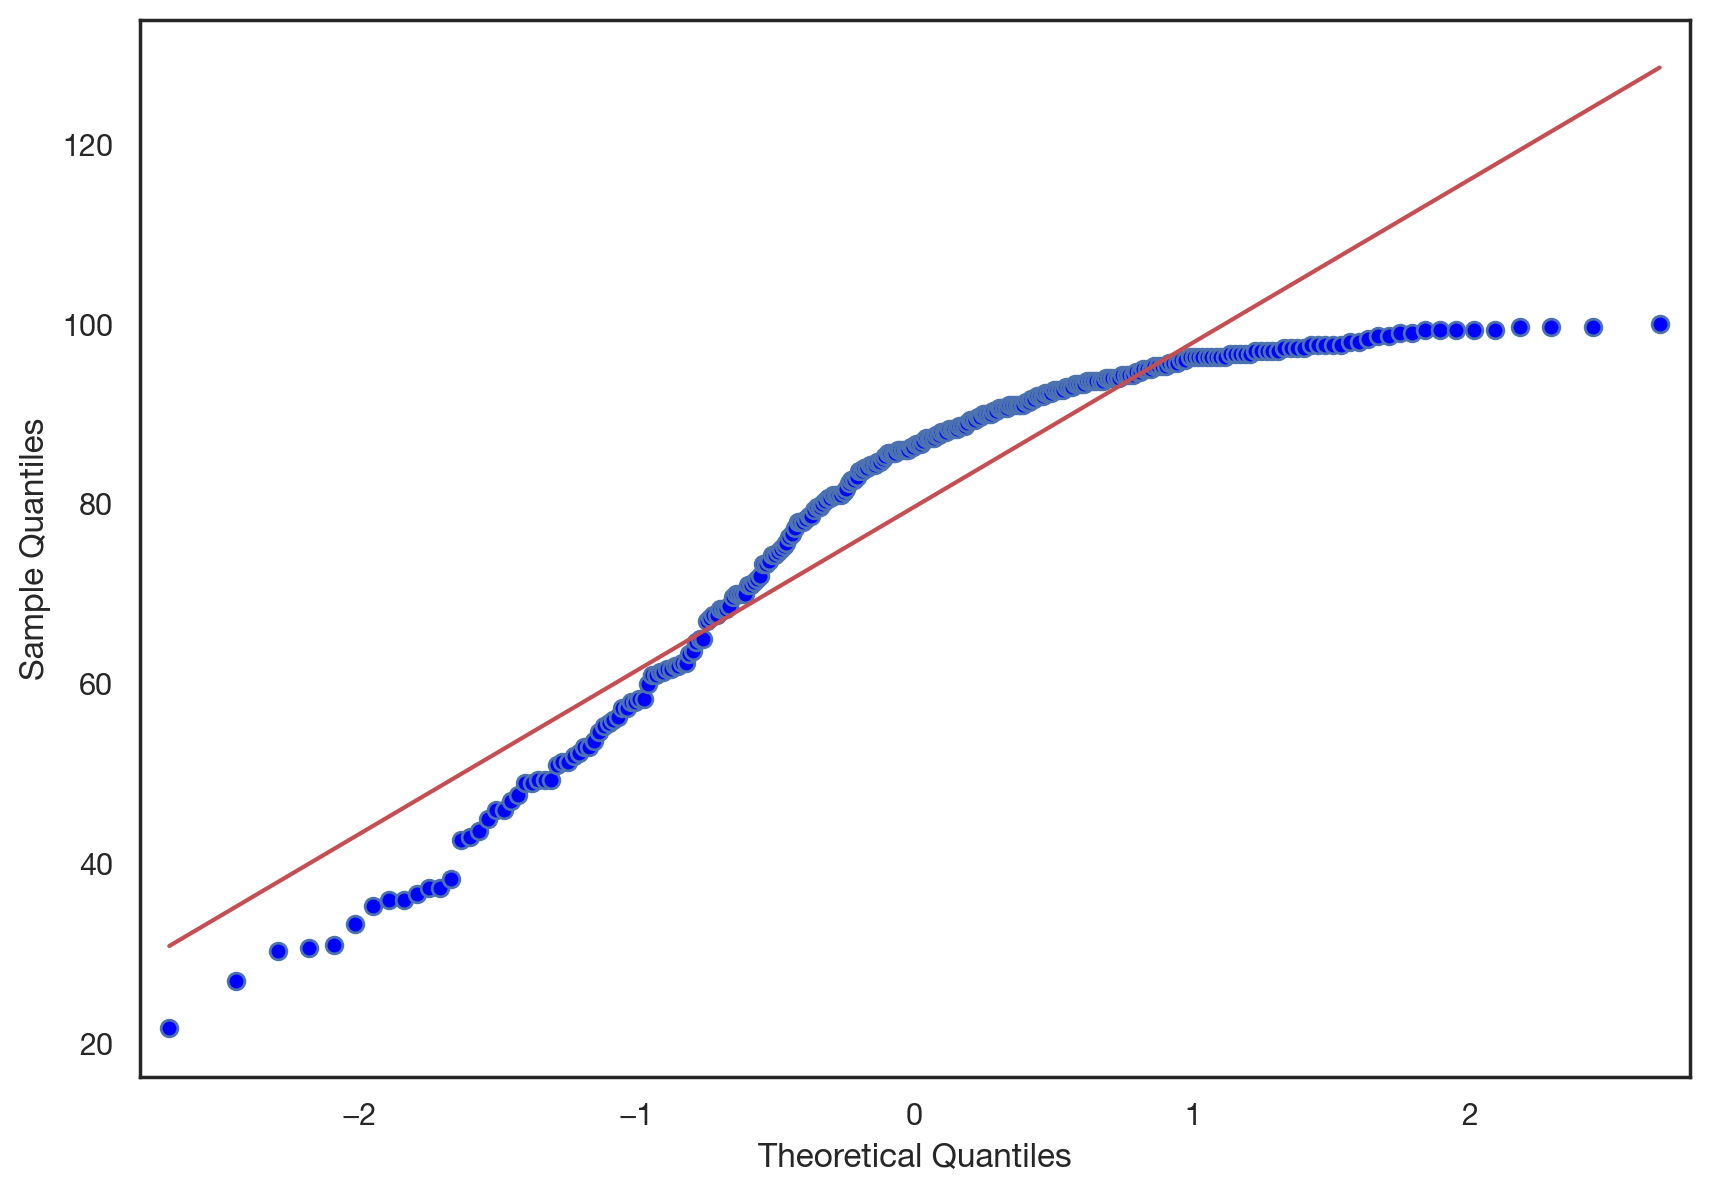

In [35]:
import statsmodels.graphics.gofplots as sm 
import numpy as np
sm.ProbPlot(np.array(MA_COL[MA_COL.STRATUM=='Stratum_6'].value)).qqplot(line='s') 

## Shapiro-Wilk test
If the Sig. value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution.

The null hypothesis for this test is that the data are normally distributed. The Prob < W value listed in the output is the p-value. If the chosen alpha level is 0.05 and the p-value is less than 0.05, then the null hypothesis that the data are normally distributed is rejected. If the p-value is greater than 0.05, then the null hypothesis is not rejected.

In [36]:
#df_try[df_try.Average_grade=='HI']


In [37]:
from scipy import stats
# rng = np.random.default_rng()
# x = stats.norm.rvs(loc=5, scale=3, size=100, random_state=rng)
# x = np.array(df_try[df_try.Average_grade=='COL'].value)

x = np.array(MA_HI[MA_HI.STRATUM=='Stratum_4'].value)
x = np.array(MA_HI[MA_HI.STRATUM=='Stratum_1'].value)
shapiro_test = stats.shapiro(x)
#shapiro_test
# ShapiroResult(statistic=0.9813305735588074, pvalue=0.16855233907699585)
# ShapiroResult(statistic=0.8680000305175781, pvalue=1.5690356999775723e-14)



In [38]:
# COL STRATUM 1: ShapiroResult(statistic=0.9810363054275513, pvalue=2.933171419508898e-14)
# COL STRATUM 6: ShapiroResult(statistic=0.8694117665290833, pvalue=6.5707691664093854e-18)

# HI stratum 1 : ShapiroResult(statistic=0.9888890981674194, pvalue=3.659307579173543e-10)
# HI stratum 6:  ShapiroResult(statistic=0.9883564710617065, pvalue=0.002646902110427618)

###  Correlation matrix showing the correlation between grades before vs after college

In [39]:
# Dataframe to use for correlation of HI and COL grades
df_corr_HI_COL = df_gen_soc_hc.copy()

In [40]:
#sns.heatmap(df_use[["HI", "COL"]].corr(method="pearson"), vmin=0.0, vmax=1.0, annot = True);

### Correlation matrix showing the (Pearson) correlation between grades (before), grades (after), gender, socio-economic level